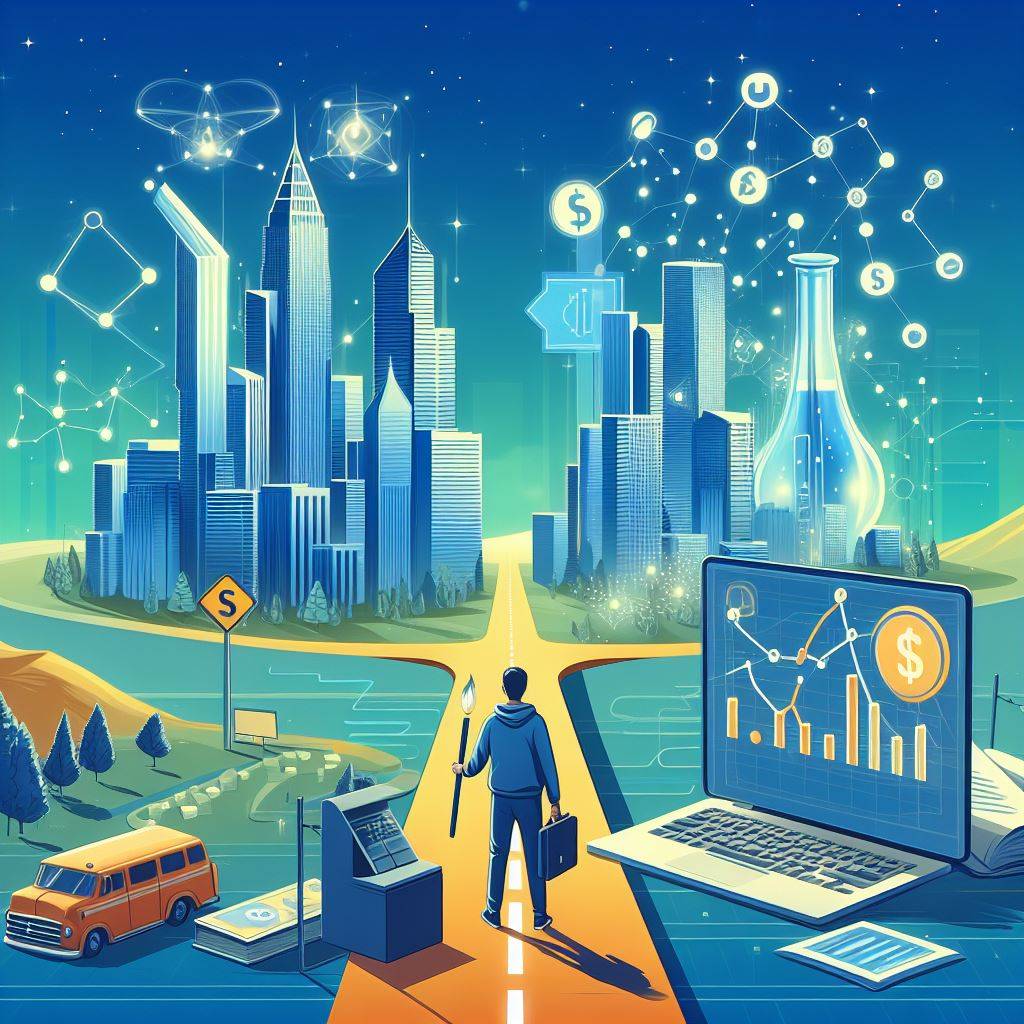

In [1]:
from IPython.display import Image

Image(filename='./imagen_portada.jpg', width=400, height=400)

# INFORMACIÓN DEL PROYECTO

### TÍTULO

<span style="color:yellow; font-size:56px;">Descubriendo el Camino: 
<br> Un Análisis del Inicio en Ciencia de Datos a Través de Datos de Salarios</span>



### TEMA

### Este proyecto se centra en explorar y comprender los primeros pasos en la profesión de ciencia de datos utilizando datos reales de salarios. A través de un análisis exploratorio de datos detallado, investigaremos aspectos clave como los salarios esperados, las posiciones más comunes en el nivel de entrada, el tipo de compañías que suelen contratar a profesionales en etapas iniciales y los países donde estos roles son más comunes. Al profundizar en estos aspectos, proporcionaremos una visión general valiosa para aquellos que están interesados en iniciar su carrera en el campo de la ciencia de datos, ayudándoles a comprender mejor las expectativas salariales, las oportunidades laborales y los posibles caminos profesionales disponibles en esta área.

### HIPÓTESIS

# Hipotesis_1 = "Los salarios iniciales varían significativamente según factores como la ubicación geográfica, el tipo de empresa y el nivel de experiencia."


- **Hipótesis 2:** Los salarios iniciales en ciencia de datos son más altos en países con un fuerte desarrollo tecnológico, como Estados Unidos, Reino Unido o Canadá, en comparación con países en vías de desarrollo.

- **Hipótesis 3:** Las posiciones de nivel de entrada en ciencia de datos, como analista de datos, científico de datos junior o ingeniero de datos junior, son las más comunes entre los recién graduados o aquellos con poca experiencia laboral.

- **Hipótesis 4:** Las empresas que ofrecen una mayor proporción de trabajo remoto tienden a pagar salarios más altos para los roles de entrada en ciencia de datos, ya que pueden acceder a un pool más amplio de talentos sin las restricciones geográficas.

- **Hipótesis 5:** Los salarios iniciales en ciencia de datos tienden a aumentar significativamente con la experiencia, lo que indica una fuerte correlación entre la experiencia laboral y la compensación salarial en este campo.




## OBTENCIÓN DE LOS DATOS

### DATASETS Y FUENTES ALTERNATIVAS DE DATOS

Incluye aquí una vista del dataset o datasets de los que partirás para poder evaluar tu hipótesis. <br>
También incluye el origen de estos datos y su fuente.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:


# Ruta del archivo CSV relativa al directorio actual
ruta = "salaries.csv"

# Cargar el dataset
data = pd.read_csv(ruta)

# Mostrar las primeras filas del dataset para verificar que se haya cargado correctamente
data.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,MI,FT,AI Engineer,360000,ILS,107093,IL,100,IL,L
1,2024,MI,FT,Data Scientist,172000,USD,172000,US,0,US,M
2,2024,MI,FT,Data Scientist,75600,USD,75600,US,0,US,M
3,2024,MI,FT,Machine Learning Engineer,265400,USD,265400,US,0,US,M
4,2024,MI,FT,Machine Learning Engineer,127400,USD,127400,US,0,US,M



fuente_1 = "https://ai-jobs.net/salaries/2024/"

El archivo de descarga básicamente contiene una única tabla con toda la información salarial estructurada de la siguiente manera:

- **work_year**: El año en que se pagó el salario.

- **experience_level**: El nivel de experiencia en el trabajo durante el año, con los siguientes valores posibles:
  - EN: Nivel de entrada / Junior
  - MI: Nivel medio / Intermedio
  - SE: Nivel senior / Experto
  - EX: Nivel ejecutivo / Director

- **employment_type**: El tipo de empleo para el rol:
  - PT: Tiempo parcial
  - FT: Tiempo completo
  - CT: Contrato
  - FL: Trabajo independiente

- **job_title**: El puesto trabajado durante el año.

- **salary**: La cantidad total del salario bruto pagado.

- **salary_currency**: La moneda del salario pagado como un código de moneda ISO 4217.

- **salary_in_usd**: El salario en USD (tasa de cambio dividida por la tasa USD promedio del año respectivo) mediante datos estadísticos del BIS y bancos centrales.

- **employee_residence**: El país de residencia principal del empleado durante el año laboral como un código de país ISO 3166.

- **remote_ratio**: La cantidad general de trabajo realizado de forma remota, con los siguientes valores posibles:
  - 0: Sin trabajo remoto (menos del 20%)
  - 50: Parcialmente remoto/híbrido
  - 100: Totalmente remoto (más del 80%)

- **company_location**: El país de la oficina principal del empleador o sucursal contratante como un código de país ISO 3166.

- **company_size**: El número promedio de personas que trabajaron para la empresa durante el año:
  - S: menos de 50 empleados (pequeña)
  - M: de 50 a 250 empleados (mediana)
  - L: más de 250 empleados (grande)

**Términos de uso:** Este conjunto de datos se publica en el dominio público bajo CC0.



Aseguramos la limpieza del dataset

In [3]:
# Verificar si hay valores nulos en el conjunto de datos
print(data.isnull().sum())

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15486 entries, 0 to 15485
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           15486 non-null  int64 
 1   experience_level    15486 non-null  object
 2   employment_type     15486 non-null  object
 3   job_title           15486 non-null  object
 4   salary              15486 non-null  int64 
 5   salary_currency     15486 non-null  object
 6   salary_in_usd       15486 non-null  int64 
 7   employee_residence  15486 non-null  object
 8   remote_ratio        15486 non-null  int64 
 9   company_location    15486 non-null  object
 10  company_size        15486 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.3+ MB


In [5]:
# Calcular estadísticas descriptivas para identificar valores atípicos
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,15486.000000,1.548600e+04,15486.000000,15486.000000
mean,2023.174545,1.647509e+05,149970.573615,32.497094
std,0.707413,3.503199e+05,68810.115344,46.406786
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.021250e+05,102000.000000,0.000000
50%,2023.000000,1.422000e+05,141525.000000,0.000000
75%,2024.000000,1.880000e+05,185975.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [6]:
#Verificar valores unicos en las columnas categoricas
categorical_columns = ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']

for column in categorical_columns:
    print(column, data[column].unique())


experience_level ['MI' 'SE' 'EN' 'EX']
employment_type ['FT' 'PT' 'FL' 'CT']
job_title ['AI Engineer' 'Data Scientist' 'Machine Learning Engineer'
 'Data Architect' 'Business Intelligence Analyst' 'Data Engineer'
 'Data Manager' 'Data Analyst' 'ML Engineer' 'Data Specialist'
 'Data Product Owner' 'Data Analytics Lead' 'Applied Scientist'
 'Analytics Engineer' 'Research Scientist' 'Data Operations Manager'
 'Data Science' 'Business Intelligence Developer' 'Business Intelligence'
 'Data Modeler' 'Machine Learning Scientist'
 'Business Intelligence Engineer' 'Robotics Engineer'
 'Data Management Analyst' 'Data Science Manager' 'Research Engineer'
 'AI Research Scientist' 'Business Intelligence Manager'
 'Research Analyst' 'Data Operations Specialist' 'Bear Robotics'
 'Data Science Consultant' 'Data Analytics Manager' 'BI Developer'
 'Data Lead' 'Data Infrastructure Engineer' 'Data Operations Associate'
 'AI Architect' 'Business Intelligence Lead' 'Data Science Engineer'
 'Data Product Man

In [7]:
# Contar la cantidad de datos por año
datos_por_año = data['work_year'].value_counts().sort_index(ascending=False)

# Mostrar el resultado
print(datos_por_año)


work_year
2024    5019
2023    8519
2022    1655
2021     218
2020      75
Name: count, dtype: int64


Examinamos 2021 y 2020 con más detalle

In [8]:
# Filtrar los datos para el año 2021
datos_2021 = data[data['work_year'] == 2021]

# Contar la frecuencia de cada título de trabajo
recuento_job_title_2021 = datos_2021['job_title'].value_counts().head(20)

# Mostrar el resultado
print(recuento_job_title_2021)


job_title
Data Scientist                       40
Data Engineer                        37
Data Analyst                         20
Machine Learning Engineer            18
Research Scientist                   10
Data Science Manager                  6
Principal Data Scientist              5
Director of Data Science              5
Data Science Consultant               5
Big Data Engineer                     4
ML Engineer                           4
BI Data Analyst                       4
Lead Data Engineer                    3
Data Architect                        3
Computer Vision Engineer              3
Data Analytics Manager                3
Data Analytics Engineer               3
Machine Learning Scientist            3
Head of Data                          3
Computer Vision Software Engineer     3
Name: count, dtype: int64


In [9]:
# Filtrar los datos para el año 2020
datos_2020 = data[data['work_year'] == 2020]

# Contar la frecuencia de cada título de trabajo
recuento_job_title_2020 = datos_2020['job_title'].value_counts().head(20)

# Mostrar el resultado
print(recuento_job_title_2020)

job_title
Data Scientist                21
Data Engineer                 13
Data Analyst                   6
Machine Learning Engineer      4
Big Data Engineer              3
Business Data Analyst          3
Lead Data Engineer             2
Staff Data Analyst             2
Research Scientist             2
Lead Data Scientist            2
BI Data Analyst                1
Machine Learning Scientist     1
Director of Data Science       1
AI Scientist                   1
Computer Vision Engineer       1
Lead Data Analyst              1
Principal Data Scientist       1
Azure Data Engineer            1
Data Science Consultant        1
ML Engineer                    1
Name: count, dtype: int64


In [10]:


# Filtrar los datos para cada año y contar la frecuencia de cada título de trabajo excluyendo 2020
recuento_job_title_por_año = {}
for año in range(2021, 2025):
    datos_año = data[data['work_year'] == año]
    recuento_job_title_por_año[año] = datos_año['job_title'].value_counts().head(20)

# Crear un DataFrame con los resultados
tabla_recuento_job_title = pd.DataFrame(recuento_job_title_por_año)

# Mostrar la tabla
print(tabla_recuento_job_title)


                                    2021   2022    2023   2024
job_title                                                     
AI Engineer                          NaN    NaN    47.0   60.0
AI Scientist                         NaN    8.0     NaN    NaN
Analytics Engineer                   NaN   56.0   222.0  137.0
Applied Machine Learning Scientist   NaN    9.0     NaN    NaN
Applied Scientist                    NaN   18.0   280.0  107.0
BI Data Analyst                      4.0    NaN     NaN    NaN
BI Developer                         NaN    NaN    55.0    NaN
Big Data Engineer                    4.0    NaN     NaN    NaN
Business Data Analyst                NaN    7.0     NaN    NaN
Business Intelligence                NaN    NaN     NaN   72.0
Business Intelligence Analyst        NaN    NaN    78.0   85.0
Business Intelligence Developer      NaN    NaN     NaN   34.0
Business Intelligence Engineer       NaN    NaN   164.0   72.0
Computer Vision Engineer             3.0    NaN     NaN

In [11]:
# Realizar un recuento de cada uno de los títulos de trabajo
recuento_job_title = data['job_title'].value_counts()

# Mostrar el resultado
recuento_job_title.head(30)



job_title
Data Engineer                               3262
Data Scientist                              3140
Data Analyst                                2286
Machine Learning Engineer                   1618
Research Scientist                           497
Analytics Engineer                           415
Applied Scientist                            405
Data Architect                               387
Research Engineer                            289
Business Intelligence Engineer               236
Data Science                                 229
Data Manager                                 202
ML Engineer                                  171
Business Intelligence Analyst                163
Machine Learning Scientist                   130
Data Science Manager                         116
Research Analyst                             111
AI Engineer                                  108
BI Developer                                  86
Data Science Consultant                       83
Data Speci

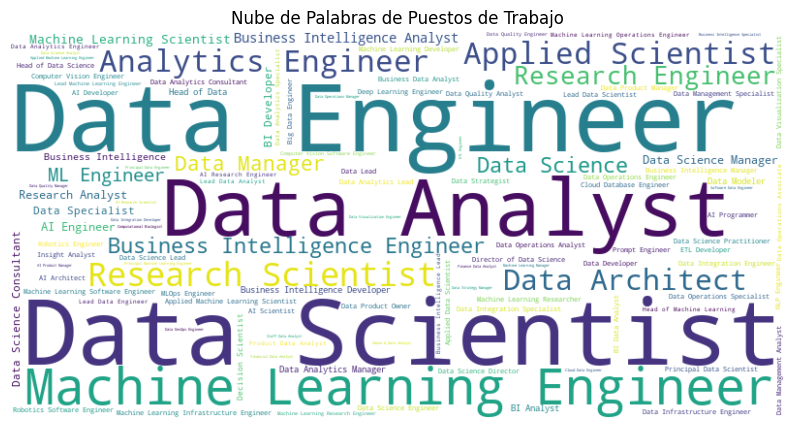

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(recuento_job_title)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Puestos de Trabajo')
plt.show()


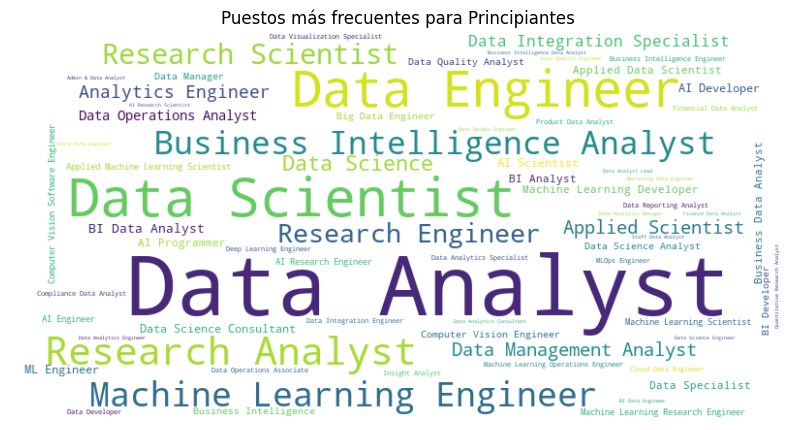

In [13]:
# Filtrar los datos para el nivel de experiencia "Entry level"
entry_level_data = data[data['experience_level'] == 'EN']

# Contar la frecuencia de cada título de trabajo para entry level
frecuencia_entry_level = entry_level_data['job_title'].value_counts()

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frecuencia_entry_level)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Puestos más frecuentes para Principiantes')
plt.show()

In [14]:
# Filtrar los datos originales para incluir solo los años 2021, 2022, 2023 y 2024
datos_2021_2024 = data[data['work_year'].isin([2021, 2022, 2023, 2024])]

# Inicializar un diccionario para almacenar los títulos de trabajo más frecuentes para cada año
top_titulos_por_año = {}

# Iterar sobre cada año y encontrar los 5 títulos de trabajo más frecuentes
for año in [2021, 2022, 2023, 2024]:
    # Filtrar los datos para el año actual
    datos_año_actual = datos_2021_2024[datos_2021_2024['work_year'] == año]
    # Contar la frecuencia de cada título de trabajo
    frecuencia_titulos = datos_año_actual['job_title'].value_counts()
    # Obtener los 5 títulos de trabajo más frecuentes
    top_titulos = frecuencia_titulos.head(5).index.tolist()
    # Almacenar los títulos de trabajo más frecuentes para el año actual en el diccionario
    top_titulos_por_año[año] = top_titulos

# Construir un nuevo DataFrame con los años y los 5 títulos de trabajo más frecuentes para cada año
nuevo_dataset = pd.DataFrame(top_titulos_por_año)

# Mostrar el nuevo dataset
nuevo_dataset


,2021,2022,2023,2024
0,Data Scientist,Data Engineer,Data Engineer,Data Scientist
1,Data Engineer,Data Scientist,Data Scientist,Data Engineer
2,Data Analyst,Data Analyst,Data Analyst,Data Analyst
3,Machine Learning Engineer,Machine Learning Engineer,Machine Learning Engineer,Machine Learning Engineer
4,Research Scientist,Analytics Engineer,Research Scientist,Data Science


In [15]:
# Filtrar los datos originales para incluir solo los años 2021, 2022, 2023 y 2024 y el nivel de experiencia "Entry level"
datos_entry_level_2021_2024 = data[(data['work_year'].isin([2021, 2022, 2023, 2024])) & (data['experience_level'] == 'EN')]

# Inicializar un diccionario para almacenar los títulos de trabajo más frecuentes para cada año y nivel de experiencia
top_titulos_entry_level_por_año = {}

# Iterar sobre cada año y encontrar los 5 títulos de trabajo más frecuentes para el nivel de experiencia "Entry level"
for año in [2021, 2022, 2023, 2024]:
    # Filtrar los datos para el año actual
    datos_año_actual = datos_entry_level_2021_2024[datos_entry_level_2021_2024['work_year'] == año]
    # Contar la frecuencia de cada título de trabajo
    frecuencia_titulos = datos_año_actual['job_title'].value_counts()
    # Obtener los 5 títulos de trabajo más frecuentes
    top_titulos = frecuencia_titulos.head(5).index.tolist()
    # Almacenar los títulos de trabajo más frecuentes para el año actual en el diccionario
    top_titulos_entry_level_por_año[año] = top_titulos

# Construir un nuevo DataFrame con los años y los 5 títulos de trabajo más frecuentes para el nivel de experiencia "Entry level"
nuevo_dataset_entry_level = pd.DataFrame(top_titulos_entry_level_por_año)

# Mostrar el nuevo dataset para el nivel de experiencia "Entry level"
nuevo_dataset_entry_level


,2021,2022,2023,2024
0,Data Scientist,Data Scientist,Data Analyst,Data Analyst
1,Data Engineer,Data Engineer,Data Scientist,Research Analyst
2,Machine Learning Engineer,Data Analyst,Data Engineer,Business Intelligence Analyst
3,Data Analyst,Machine Learning Engineer,Research Analyst,Data Scientist
4,Data Science Consultant,AI Scientist,Research Scientist,Data Engineer


In [16]:
# Filtrar los datos originales para incluir solo los años 2021, 2022, 2023 y 2024 y el nivel de experiencia "Entry level"
datos_entry_level_2021_2024 = data[(data['work_year'].isin([2021, 2022, 2023, 2024])) & (data['experience_level'] == 'EN')]

# Inicializar una lista para almacenar las filas del nuevo conjunto de datos
filas_nuevo_dataset_entry_level = []

# Iterar sobre cada año y encontrar los 5 títulos de trabajo más frecuentes para el nivel de experiencia "Entry level"
for año in [2021, 2022, 2023, 2024]:
    # Filtrar los datos para el año actual
    datos_año_actual = datos_entry_level_2021_2024[datos_entry_level_2021_2024['work_year'] == año]
    # Contar la frecuencia de cada título de trabajo
    frecuencia_titulos = datos_año_actual['job_title'].value_counts()
    # Obtener los 5 títulos de trabajo más frecuentes
    top_titulos = frecuencia_titulos.head(5)
    # Calcular la frecuencia total de títulos de trabajo para el año actual
    frecuencia_total = frecuencia_titulos.sum()
    # Calcular el porcentaje de frecuencia para cada título de trabajo y agregarlo a la lista de filas
    for titulo, frecuencia in top_titulos.items():
        porcentaje = (frecuencia / frecuencia_total) * 100
        filas_nuevo_dataset_entry_level.append({'Job Title': titulo, f'Año {año} (%)': porcentaje})

# Construir el nuevo DataFrame con los datos de las filas
nuevo_dataset_entry_level = pd.DataFrame(filas_nuevo_dataset_entry_level).round(2)

# Mostrar el nuevo dataset para el nivel de experiencia "Entry level" con los nombres de los job titles y sus porcentajes de frecuencia
nuevo_dataset_entry_level


,Job Title,Año 2021 (%),Año 2022 (%),Año 2023 (%),Año 2024 (%)
0,Data Scientist,19.57,NaN,NaN,NaN
1,Data Engineer,13.04,NaN,NaN,NaN
2,Machine Learning Engineer,13.04,NaN,NaN,NaN
3,Data Analyst,13.04,NaN,NaN,NaN
4,Data Science Consultant,8.70,NaN,NaN,NaN
5,Data Scientist,NaN,25.00,NaN,NaN
6,Data Engineer,NaN,21.55,NaN,NaN
7,Data Analyst,NaN,14.66,NaN,NaN
8,Machine Learning Engineer,NaN,8.62,NaN,NaN
9,AI Scientist,NaN,2.59,NaN,NaN


<Figure size 1000x600 with 0 Axes>

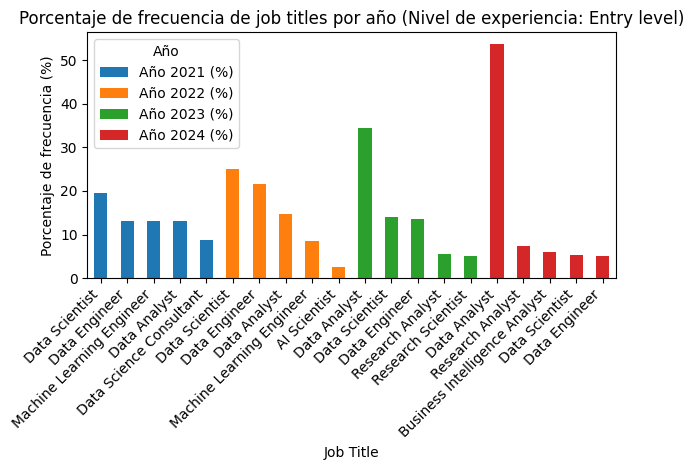

In [31]:
# Definir los datos
job_titles = nuevo_dataset_entry_level['Job Title']
porcentajes_por_año = nuevo_dataset_entry_level.drop(columns='Job Title')

# Crear la gráfica de barras apiladas
plt.figure(figsize=(10, 6))
porcentajes_por_año.plot(kind='bar', stacked=True)
plt.title('Porcentaje de frecuencia de job titles por año (Nivel de experiencia: Entry level)')
plt.xlabel('Job Title')
plt.ylabel('Porcentaje de frecuencia (%)')
plt.xticks(range(len(job_titles)), job_titles, rotation=45, ha='right')
plt.legend(title='Año')
plt.tight_layout()
plt.show()


In [35]:
# Obtener la cantidad de filas del DataFrame datos_entry_level_2021_2024
cantidad_filas = datos_entry_level_2021_2024.shape[0]

# Mostrar el resultado
print("La cantidad de filas en datos_entry_level_2021_2024 es:", cantidad_filas)


La cantidad de filas en datos_entry_level_2021_2024 es: 1201


In [36]:
datos_entry_level_2021_2024.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 7 to 15461
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           1201 non-null   int64 
 1   experience_level    1201 non-null   object
 2   employment_type     1201 non-null   object
 3   job_title           1201 non-null   object
 4   salary              1201 non-null   int64 
 5   salary_currency     1201 non-null   object
 6   salary_in_usd       1201 non-null   int64 
 7   employee_residence  1201 non-null   object
 8   remote_ratio        1201 non-null   int64 
 9   company_location    1201 non-null   object
 10  company_size        1201 non-null   object
 11  grupo               1201 non-null   object
dtypes: int64(4), object(8)
memory usage: 122.0+ KB


In [37]:
datos_entry_level_2021_2024.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,1201.000000,1.201000e+03,1201.000000,1201.000000
mean,2023.305579,1.250663e+05,92447.421316,31.557036
std,0.797315,3.453820e+05,51933.973814,44.805025
min,2021.000000,1.500000e+04,15000.000000,0.000000
25%,2023.000000,5.830000e+04,58400.000000,0.000000
50%,2023.000000,8.500000e+04,83000.000000,0.000000
75%,2024.000000,1.200000e+05,115360.000000,100.000000
max,2024.000000,6.600000e+06,774000.000000,100.000000


In [41]:
# Contar la cantidad de datos por país
cantidad_por_pais = datos_entry_level_2021_2024['employee_residence'].value_counts()

# Calcular el total de datos
total_datos = cantidad_por_pais.sum()

# Calcular el porcentaje de datos que aporta cada país
porcentaje_por_pais = ((cantidad_por_pais / total_datos) * 100).round(2)

# Mostrar el resultado
print("Porcentaje de datos que aporta cada país en datos_entry_level_2021_2024:")
porcentaje_por_pais.head(10)



Porcentaje de datos que aporta cada país en datos_entry_level_2021_2024:


employee_residence
US    76.44
GB     6.99
CA     2.58
IN     1.75
DE     1.50
FR     0.92
AU     0.83
NL     0.83
ES     0.75
LT     0.50
Name: count, dtype: float64

In [43]:
# Contar la cantidad de datos por país de la compañía
cantidad_por_pais_compañia = datos_entry_level_2021_2024['company_location'].value_counts()

# Calcular el total de datos
total_datos_compañia = cantidad_por_pais_compañia.sum()

# Calcular el porcentaje de datos que aporta cada país de la compañía
porcentaje_por_pais_compañia = (cantidad_por_pais_compañia / total_datos_compañia) * 100

# Mostrar el resultado
print("Porcentaje de datos que aporta cada país de la compañía en datos_entry_level_2021_2024:")
porcentaje_por_pais_compañia.head(10)


Porcentaje de datos que aporta cada país de la compañía en datos_entry_level_2021_2024:


company_location
US    77.601998
GB     7.077435
CA     2.497918
DE     1.998335
IN     1.165695
FR     0.999167
AU     0.999167
NL     0.832639
ES     0.749376
LT     0.499584
Name: count, dtype: float64

In [44]:
# Contar la cantidad de datos por moneda de cobro
cantidad_por_moneda_cobro = datos_entry_level_2021_2024['salary_currency'].value_counts()

# Calcular el total de datos
total_datos_moneda_cobro = cantidad_por_moneda_cobro.sum()

# Calcular el porcentaje de datos que aporta cada moneda de cobro
porcentaje_por_moneda_cobro = (cantidad_por_moneda_cobro / total_datos_moneda_cobro) * 100

# Mostrar el resultado
print("Porcentaje de datos que aporta cada moneda de cobro en datos_entry_level_2021_2024:")
print(porcentaje_por_moneda_cobro)


Porcentaje de datos que aporta cada moneda de cobro en datos_entry_level_2021_2024:
salary_currency
USD    84.429642
GBP     6.994172
EUR     5.745212
INR     1.082431
CAD     0.666112
CHF     0.249792
PLN     0.166528
AUD     0.166528
DKK     0.166528
JPY     0.083264
BRL     0.083264
SGD     0.083264
HUF     0.083264
Name: count, dtype: float64


In [11]:
# Obtener la lista de títulos de trabajo que aparecen en todos los años
titulos_comunes = set(data['job_title'])
for año in range(2021, 2025):
    datos_año = data[data['work_year'] == año]
    titulos_comunes = titulos_comunes.intersection(set(datos_año['job_title']))

# Inicializar un diccionario para almacenar el recuento de los títulos de trabajo comunes por año
recuento_job_title_por_año = {}

# Calcular el recuento de los títulos de trabajo comunes para cada año
for año in range(2021, 2025):
    datos_año = data[data['work_year'] == año]
    datos_titulos_comunes = datos_año[datos_año['job_title'].isin(titulos_comunes)]
    recuento_job_title_por_año[año] = datos_titulos_comunes['job_title'].value_counts().head(5)

# Crear un DataFrame con los resultados
tabla_recuento_job_title = pd.DataFrame(recuento_job_title_por_año)

# Mostrar la tabla
print(tabla_recuento_job_title)


                           2021   2022    2023   2024
job_title                                            
Data Analyst               20.0  272.0  1266.0  722.0
Data Architect              NaN   46.0     NaN    NaN
Data Engineer              37.0  488.0  1852.0  872.0
Data Scientist             40.0  404.0  1711.0  964.0
Machine Learning Engineer  18.0  108.0   966.0  522.0
Research Scientist         10.0    NaN   286.0  184.0


In [13]:
# Filtrar los datos para el nivel de experiencia "Entry-level"
entry_level_data = data[data['experience_level'] == 'EN']

# Inicializar un diccionario para almacenar el recuento de los títulos de trabajo más frecuentes por año
top_job_titles_by_year = {}

# Iterar sobre los años y calcular el recuento de los títulos de trabajo más frecuentes para cada uno
for year in range(2021, 2025):
    year_data = entry_level_data[entry_level_data['work_year'] == year]
    top_job_titles_by_year[year] = year_data['job_title'].value_counts().head(5)

# Mostrar los resultados
for year, titles in top_job_titles_by_year.items():
    print(f"Año {year}:")
    print(titles)
    print()


Año 2021:
job_title
Data Scientist               9
Data Engineer                6
Machine Learning Engineer    6
Data Analyst                 6
Data Science Consultant      4
Name: count, dtype: int64

Año 2022:
job_title
Data Scientist               29
Data Engineer                25
Data Analyst                 17
Machine Learning Engineer    10
AI Scientist                  3
Name: count, dtype: int64

Año 2023:
job_title
Data Analyst          160
Data Scientist         65
Data Engineer          63
Research Analyst       26
Research Scientist     23
Name: count, dtype: int64

Año 2024:
job_title
Data Analyst                     309
Research Analyst                  42
Business Intelligence Analyst     34
Data Scientist                    31
Data Engineer                     29
Name: count, dtype: int64



In [14]:
# Filtrar los datos para el nivel de experiencia "Entry-level"
entry_level_data = data[data['experience_level'] == 'EN']

# Inicializar un diccionario para almacenar el recuento de los títulos de trabajo más frecuentes por año
top_job_titles_by_year = {}

# Iterar sobre los años y calcular el recuento de los títulos de trabajo más frecuentes para cada uno
for year in range(2021, 2025):
    year_data = entry_level_data[entry_level_data['work_year'] == year]
    top_job_titles_by_year[year] = year_data['job_title'].value_counts().head(5)

# Crear un DataFrame con los resultados
tabla_entry_level = pd.DataFrame(top_job_titles_by_year)

# Mostrar la tabla
print(tabla_entry_level)


                               2021  2022   2023   2024
job_title                                              
AI Scientist                    NaN   3.0    NaN    NaN
Business Intelligence Analyst   NaN   NaN    NaN   34.0
Data Analyst                    6.0  17.0  160.0  309.0
Data Engineer                   6.0  25.0   63.0   29.0
Data Science Consultant         4.0   NaN    NaN    NaN
Data Scientist                  9.0  29.0   65.0   31.0
Machine Learning Engineer       6.0  10.0    NaN    NaN
Research Analyst                NaN   NaN   26.0   42.0
Research Scientist              NaN   NaN   23.0    NaN


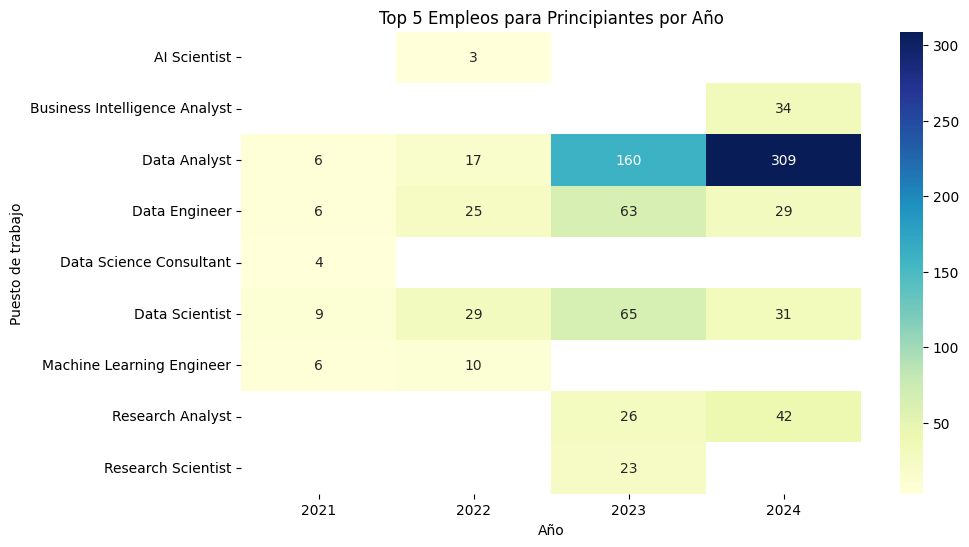

In [17]:

# Filtrar los datos para el nivel de experiencia "Entry-level"
entry_level_data = data[data['experience_level'] == 'EN']

# Inicializar un diccionario para almacenar el recuento de los títulos de trabajo más frecuentes por año
top_job_titles_by_year = {}

# Iterar sobre los años y calcular el recuento de los títulos de trabajo más frecuentes para cada uno
for year in range(2021, 2025):
    year_data = entry_level_data[entry_level_data['work_year'] == year]
    top_job_titles_by_year[year] = year_data['job_title'].value_counts().head(5)

# Crear un DataFrame con los resultados
tabla_entry_level = pd.DataFrame(top_job_titles_by_year)

# Crear un mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(tabla_entry_level, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Top 5 Empleos para Principiantes por Año')
plt.xlabel('Año')
plt.ylabel('Puesto de trabajo')
plt.show()


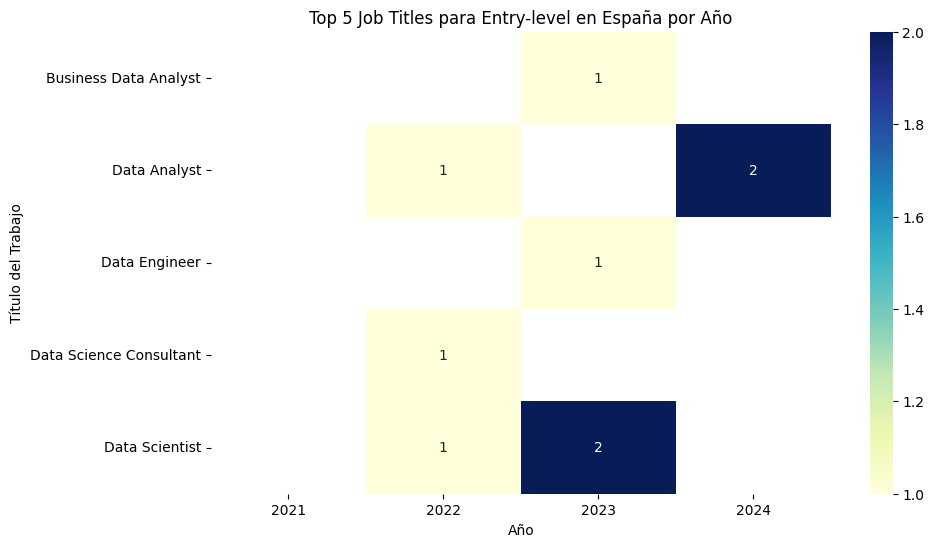

In [18]:

# Filtrar los datos para el nivel de experiencia "Entry-level" y residencia en España
entry_level_spain_data = data[(data['experience_level'] == 'EN') & (data['employee_residence'] == 'ES')]

# Inicializar un diccionario para almacenar el recuento de los títulos de trabajo más frecuentes por año
top_job_titles_by_year = {}

# Iterar sobre los años y calcular el recuento de los títulos de trabajo más frecuentes para cada uno
for year in range(2021, 2025):
    year_data = entry_level_spain_data[entry_level_spain_data['work_year'] == year]
    top_job_titles_by_year[year] = year_data['job_title'].value_counts().head(5)

# Crear un DataFrame con los resultados
tabla_entry_level_spain = pd.DataFrame(top_job_titles_by_year)

# Crear un mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(tabla_entry_level_spain, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Top 5 Job Titles para Entry-level en España por Año')
plt.xlabel('Año')
plt.ylabel('Título del Trabajo')
plt.show()


In [20]:
# Contar el número de trabajadores con lugar de residencia distinto al de su empresa
trabajadores_distinto_pais = (data['employee_residence'] != data['company_location']).sum()

# Calcular el total de trabajadores
total_trabajadores = len(data)

# Calcular el porcentaje
porcentaje_distinto_pais = ((trabajadores_distinto_pais / total_trabajadores) * 100).round (2)

print("Cantidad de trabajadores con lugar de residencia distinto al de su empresa:", trabajadores_distinto_pais)
print("Total de trabajadores:", total_trabajadores)
print("Porcentaje de trabajadores con lugar de residencia distinto al de su empresa:", porcentaje_distinto_pais, "%")


Cantidad de trabajadores con lugar de residencia distinto al de su empresa: 129
Total de trabajadores: 15486
Porcentaje de trabajadores con lugar de residencia distinto al de su empresa: 0.83 %


In [24]:
# Mapear los valores de remote_ratio a las categorías específicas
data['trabajo_remoto'] = data['remote_ratio'].map({0: 'Sin trabajo remoto (menos del 20%)',
                                                    50: 'Parcialmente remoto/híbrido',
                                                    100: 'Totalmente remoto (más del 80%)'})

# Filtrar los datos para los años 2022, 2023 y 2024
datos_2022_2024 = data[data['work_year'].isin([2022, 2023, 2024])]

# Contar la cantidad total de cada categoría de trabajo remoto por año
trabajo_remoto_totales = datos_2022_2024.groupby(['work_year', 'trabajo_remoto']).size().unstack(fill_value=0)

# Mostrar la tabla
trabajo_remoto_totales



trabajo_remoto,Parcialmente remoto/híbrido,Sin trabajo remoto (menos del 20%),Totalmente remoto (más del 80%)
work_year,,,
2022,61,709,885
2023,72,5775,2672
2024,22,3798,1199


In [30]:
# Calcular la suma total de trabajo remoto para cada año
suma_total_por_año = trabajo_remoto_totales.sum(axis=1)

# Calcular el porcentaje de cada categoría de trabajo remoto respecto al total del año
trabajo_remoto_porcentaje = (trabajo_remoto_totales.div(suma_total_por_año, axis=0) * 100).round(2)

# Mostrar la tabla con las cifras en porcentaje
trabajo_remoto_porcentaje




trabajo_remoto,Parcialmente remoto/híbrido,Sin trabajo remoto (menos del 20%),Totalmente remoto (más del 80%)
work_year,,,
2022,3.69,42.84,53.47
2023,0.85,67.79,31.37
2024,0.44,75.67,23.89


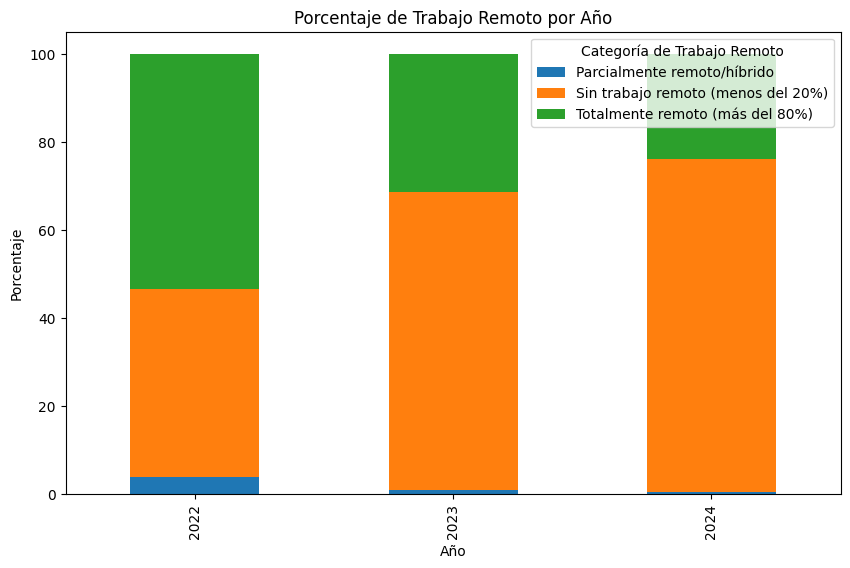

In [31]:
# Graficar un gráfico de barras apiladas
trabajo_remoto_porcentaje.plot(kind='bar', stacked=True, figsize=(10, 6))

# Añadir etiquetas y título
plt.title('Porcentaje de Trabajo Remoto por Año')
plt.xlabel('Año')
plt.ylabel('Porcentaje')
plt.legend(title='Categoría de Trabajo Remoto')

# Mostrar la gráfica
plt.show()

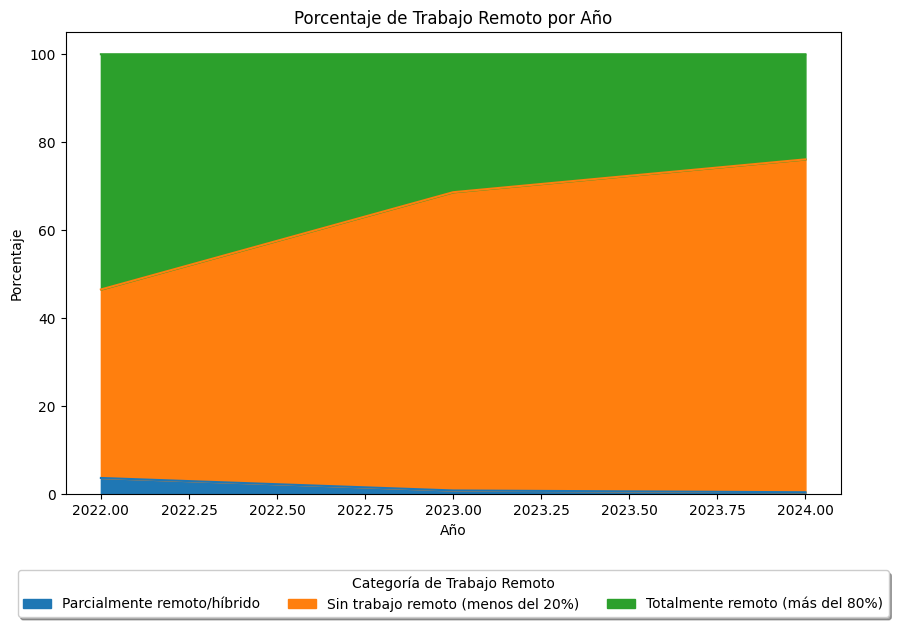

In [33]:
# Graficar un gráfico de área apilada
ax = trabajo_remoto_porcentaje.plot(kind='area', stacked=True, figsize=(10, 6))

# Añadir etiquetas y título
plt.title('Porcentaje de Trabajo Remoto por Año')
plt.xlabel('Año')
plt.ylabel('Porcentaje')

# Centrar la leyenda
ax.legend(title='Categoría de Trabajo Remoto', loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=3)

# Mostrar la gráfica
plt.show()



ConversionError: Failed to convert value(s) to axis units: Index(['2022', '2023', '2024'], dtype='object', name='work_year')

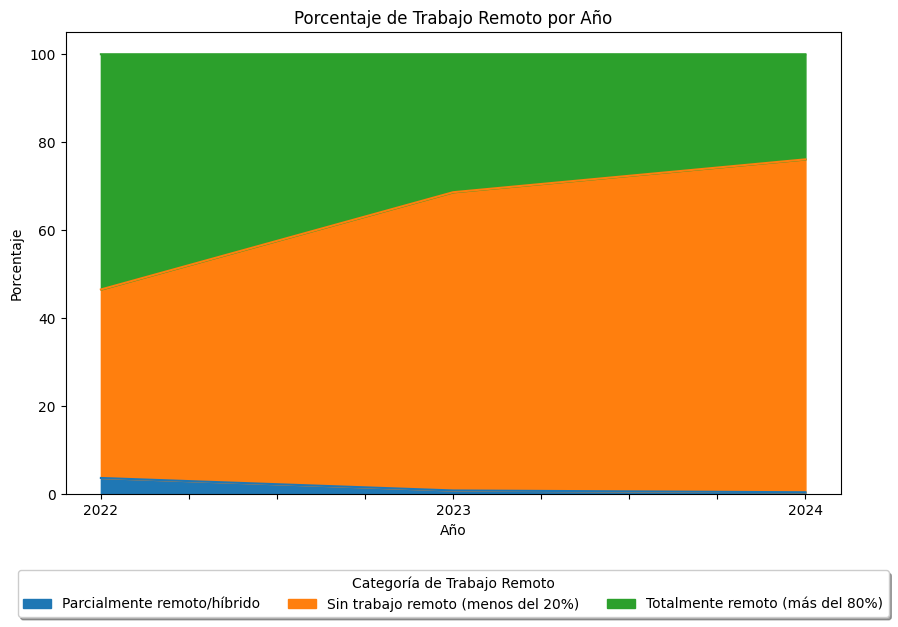

In [35]:
# Filtrar los años 2022, 2023 y 2024
años_mostrar = trabajo_remoto_porcentaje.index.intersection(['2022', '2023', '2024'])

# Graficar un gráfico de área apilada
ax = trabajo_remoto_porcentaje.plot(kind='area', stacked=True, figsize=(10, 6))

# Añadir etiquetas y título
plt.title('Porcentaje de Trabajo Remoto por Año')
plt.xlabel('Año')
plt.ylabel('Porcentaje')

# Centrar la leyenda
ax.legend(title='Categoría de Trabajo Remoto', loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=3)

# Mostrar solo los años 2022, 2023 y 2024 en el eje x
plt.xticks(años_mostrar)

# Mostrar la gráfica
plt.show()



ConversionError: Failed to convert value(s) to axis units: ['2022', '2023', '2024']

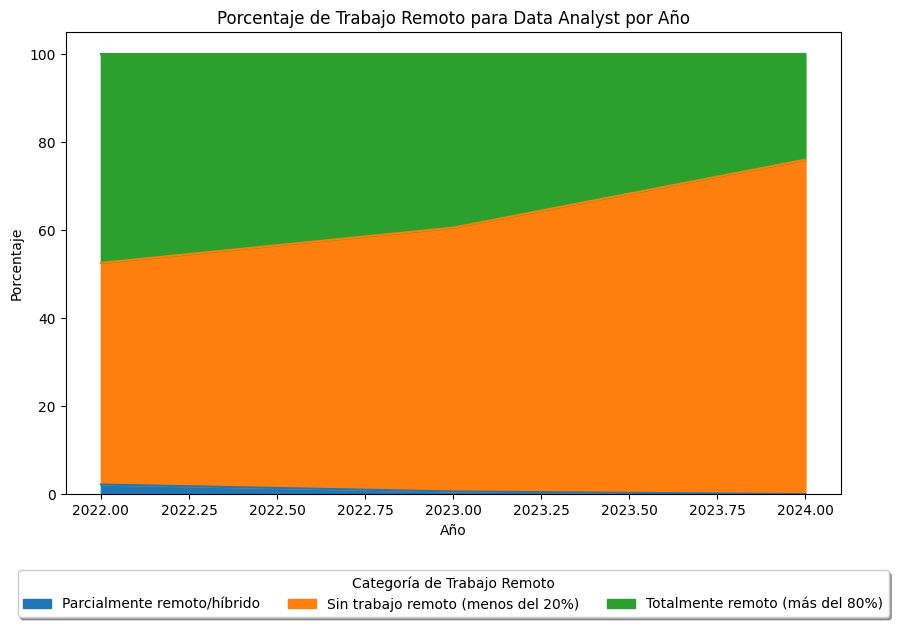

In [36]:
# Filtrar los datos para la categoría "Data Analyst" y los años 2022, 2023 y 2024
data_analyst_data = data[(data['job_title'] == 'Data Analyst') & data['work_year'].isin([2022, 2023, 2024])]

# Contar la cantidad total de cada categoría de trabajo remoto por año
data_analyst_trabajo_remoto = data_analyst_data.groupby(['work_year', 'trabajo_remoto']).size().unstack(fill_value=0)

# Calcular el porcentaje de cada categoría de trabajo remoto respecto al total del año
data_analyst_porcentaje = data_analyst_trabajo_remoto.div(data_analyst_trabajo_remoto.sum(axis=1), axis=0) * 100

# Graficar un gráfico de área apilada
ax = data_analyst_porcentaje.plot(kind='area', stacked=True, figsize=(10, 6))

# Añadir etiquetas y título
plt.title('Porcentaje de Trabajo Remoto para Data Analyst por Año')
plt.xlabel('Año')
plt.ylabel('Porcentaje')

# Centrar la leyenda
ax.legend(title='Categoría de Trabajo Remoto', loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=3)

# Mostrar solo los años 2022, 2023 y 2024 en el eje x
plt.xticks(['2022', '2023', '2024'])

# Mostrar la gráfica
plt.show()


count     15486.000000
mean     149970.573615
std       68810.115344
min       15000.000000
25%      102000.000000
50%      141525.000000
75%      185975.000000
max      800000.000000
Name: salary_in_usd, dtype: float64


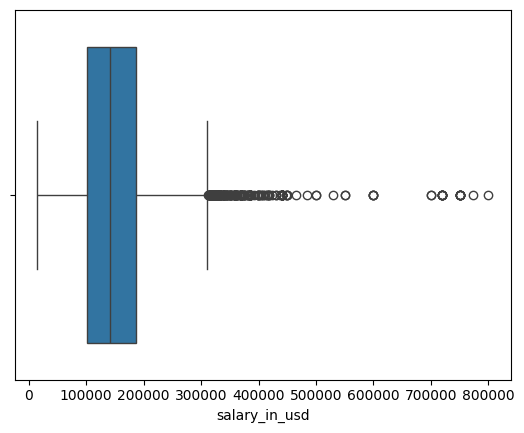

In [7]:
print(data['salary_in_usd'].describe())
# Visualizar la distribución de 'salary_in_usd'
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=data['salary_in_usd'])
plt.show()

No parece haber valores extremos merecedores de descarte.

In [8]:
# Obtener el año mínimo y máximo
year_min = data['work_year'].min()
year_max = data['work_year'].max()

print("Año mínimo:", year_min)
print("Año máximo:", year_max)


Año mínimo: 2020
Año máximo: 2024


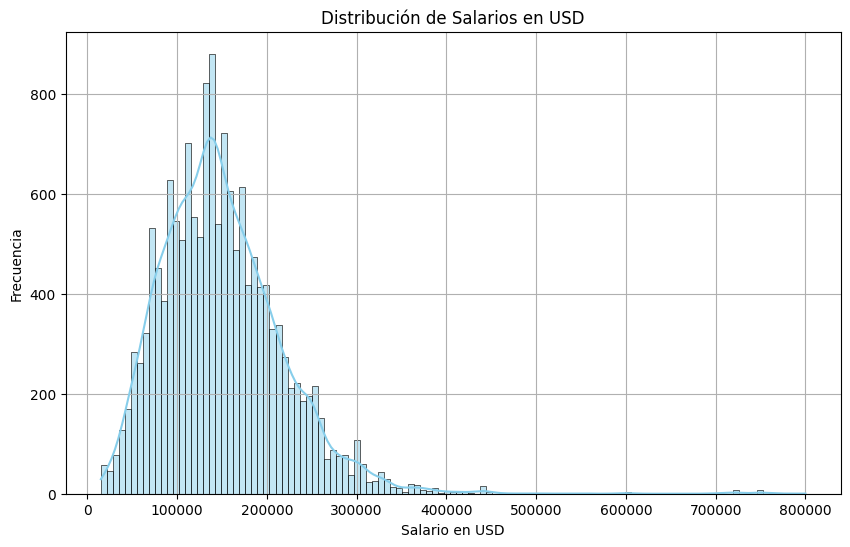

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear histograma de los salarios en USD
sns.histplot(data['salary_in_usd'], kde=True, color='skyblue')
plt.title('Distribución de Salarios en USD')
plt.xlabel('Salario en USD')
plt.ylabel('Frecuencia')
plt.grid(True)

# Mostrar el histograma
plt.show()


C:\Users\ferna\AppData\Local\Temp\ipykernel_4060\3050938875.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='salary_in_usd', y='job_title', data=data, palette='pastel')


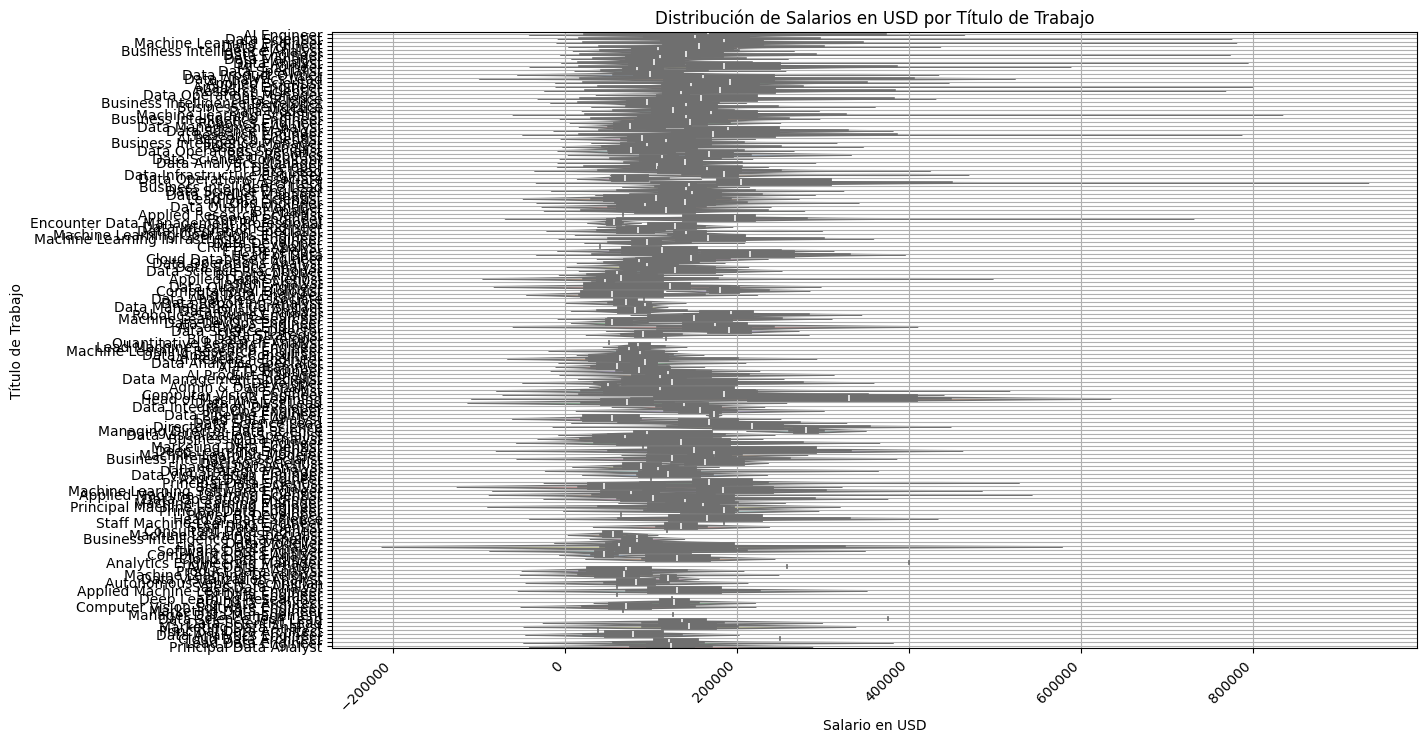

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tamaño de la figura
plt.figure(figsize=(14, 8))

# Crear un gráfico de violín para la distribución de salarios en USD por título de trabajo
sns.violinplot(x='salary_in_usd', y='job_title', data=data, palette='pastel')
plt.title('Distribución de Salarios en USD por Título de Trabajo')
plt.xlabel('Salario en USD')
plt.ylabel('Título de Trabajo')
plt.grid(True)

# Rotar las etiquetas del eje y para una mejor visualización
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()


In [11]:
# Recuento de cuántas veces aparece cada título de trabajo
job_title_counts = data['job_title'].value_counts()

# Mostrar el recuento
print(job_title_counts)


job_title
Data Engineer                    3262
Data Scientist                   3140
Data Analyst                     2286
Machine Learning Engineer        1618
Research Scientist                497
                                 ... 
AWS Data Architect                  1
Analytics Engineering Manager       1
Marketing Data Scientist            1
Power BI Developer                  1
Quantitative Research Analyst       1
Name: count, Length: 154, dtype: int64


In [12]:
job_title_counts.head(20)

job_title
Data Engineer                     3262
Data Scientist                    3140
Data Analyst                      2286
Machine Learning Engineer         1618
Research Scientist                 497
Analytics Engineer                 415
Applied Scientist                  405
Data Architect                     387
Research Engineer                  289
Business Intelligence Engineer     236
Data Science                       229
Data Manager                       202
ML Engineer                        171
Business Intelligence Analyst      163
Machine Learning Scientist         130
Data Science Manager               116
Research Analyst                   111
AI Engineer                        108
BI Developer                        86
Data Science Consultant             83
Name: count, dtype: int64

In [13]:
# Agrupar los datos por año y título de trabajo, y contar la frecuencia
titles_by_year = data.groupby(['work_year', 'job_title']).size().reset_index(name='count')

# Mostrar los primeros registros del DataFrame resultante
print(titles_by_year.head(20))


    work_year                                 job_title  count
0        2020                              AI Scientist      1
1        2020                       Azure Data Engineer      1
2        2020                           BI Data Analyst      1
3        2020                         Big Data Engineer      3
4        2020                     Business Data Analyst      3
5        2020                  Computer Vision Engineer      1
6        2020                              Data Analyst      6
7        2020                             Data Engineer     13
8        2020                   Data Science Consultant      1
9        2020                      Data Science Manager      1
10       2020                            Data Scientist     21
11       2020                  Director of Data Science      1
12       2020                         Lead Data Analyst      1
13       2020                        Lead Data Engineer      2
14       2020                       Lead Data Scientist

In [14]:
# Filtrar los títulos de trabajo que solo aparecen en el año 2020
titles_only_in_2020 = titles_by_year[titles_by_year['work_year'] == 2020]

# Mostrar los títulos de trabajo que solo aparecen en 2020
print(titles_only_in_2020['job_title'].unique())


['AI Scientist' 'Azure Data Engineer' 'BI Data Analyst'
 'Big Data Engineer' 'Business Data Analyst' 'Computer Vision Engineer'
 'Data Analyst' 'Data Engineer' 'Data Science Consultant'
 'Data Science Manager' 'Data Scientist' 'Director of Data Science'
 'Lead Data Analyst' 'Lead Data Engineer' 'Lead Data Scientist'
 'ML Engineer' 'Machine Learning Engineer'
 'Machine Learning Infrastructure Engineer' 'Machine Learning Manager'
 'Machine Learning Scientist' 'Managing Director Data Science'
 'Principal Data Scientist' 'Product Data Analyst' 'Research Scientist'
 'Sales Data Analyst' 'Staff Data Analyst' 'Staff Data Scientist']


In [15]:
# Contar cuántos años aparece cada título de trabajo
titles_count_by_year = titles_by_year.groupby('job_title')['work_year'].count()

# Filtrar los títulos que aparecen en todos los años
titles_in_all_years = titles_count_by_year[titles_count_by_year == len(data['work_year'].unique())]

# Mostrar los títulos de trabajo que aparecen en todos los años
print(titles_in_all_years.index.tolist())


['AI Scientist', 'BI Data Analyst', 'Big Data Engineer', 'Computer Vision Engineer', 'Data Analyst', 'Data Engineer', 'Data Science Consultant', 'Data Science Manager', 'Data Scientist', 'Director of Data Science', 'Lead Data Scientist', 'ML Engineer', 'Machine Learning Engineer', 'Machine Learning Infrastructure Engineer', 'Machine Learning Scientist', 'Research Scientist']


In [16]:
# Lista de títulos de trabajo que se repiten en todos los años
titles_in_all_years = ['AI Scientist', 'BI Data Analyst', 'Big Data Engineer', 'Computer Vision Engineer', 'Data Analyst', 'Data Engineer', 'Data Science Consultant', 'Data Science Manager', 'Data Scientist', 'Director of Data Science', 'Lead Data Scientist', 'ML Engineer', 'Machine Learning Engineer', 'Machine Learning Infrastructure Engineer', 'Machine Learning Scientist', 'Research Scientist']

# Crear un nuevo DataFrame solo con los registros correspondientes a los títulos de trabajo que se repiten en todos los años
data_titles_in_all_years= data[data['job_title'].isin(titles_in_all_years)]

# Mostrar la info del nuevo DataFrame
data_titles_in_all_years.info()


<class 'pandas.core.frame.DataFrame'>
Index: 11467 entries, 1 to 15485
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           11467 non-null  int64 
 1   experience_level    11467 non-null  object
 2   employment_type     11467 non-null  object
 3   job_title           11467 non-null  object
 4   salary              11467 non-null  int64 
 5   salary_currency     11467 non-null  object
 6   salary_in_usd       11467 non-null  int64 
 7   employee_residence  11467 non-null  object
 8   remote_ratio        11467 non-null  int64 
 9   company_location    11467 non-null  object
 10  company_size        11467 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.0+ MB


In [17]:
# Mostrar las primeras filas del nuevo DataFrame
data_titles_in_all_years.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,11467.000000,1.146700e+04,11467.000000,11467.000000
mean,2023.133688,1.648970e+05,150480.537281,33.033923
std,0.711353,3.775873e+05,66973.353002,46.653910
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.050000e+05,104650.000000,0.000000
50%,2023.000000,1.440000e+05,142200.000000,0.000000
75%,2024.000000,1.880000e+05,186153.000000,100.000000
max,2024.000000,3.040000e+07,774000.000000,100.000000


In [18]:
# Mostrar las primeras filas del nuevo DataFrame
data_titles_in_all_years.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,2024,MI,FT,Data Scientist,172000,USD,172000,US,0,US,M
2,2024,MI,FT,Data Scientist,75600,USD,75600,US,0,US,M
3,2024,MI,FT,Machine Learning Engineer,265400,USD,265400,US,0,US,M
4,2024,MI,FT,Machine Learning Engineer,127400,USD,127400,US,0,US,M
7,2024,EN,FT,Data Scientist,175100,USD,175100,US,0,US,M
8,2024,EN,FT,Data Scientist,82915,USD,82915,US,0,US,M
11,2024,MI,FT,Data Scientist,155000,USD,155000,US,0,US,M
12,2024,MI,FT,Data Scientist,135000,USD,135000,US,0,US,M
13,2024,MI,FT,Data Scientist,150200,USD,150200,CA,0,CA,M
14,2024,MI,FT,Data Scientist,100100,USD,100100,CA,0,CA,M


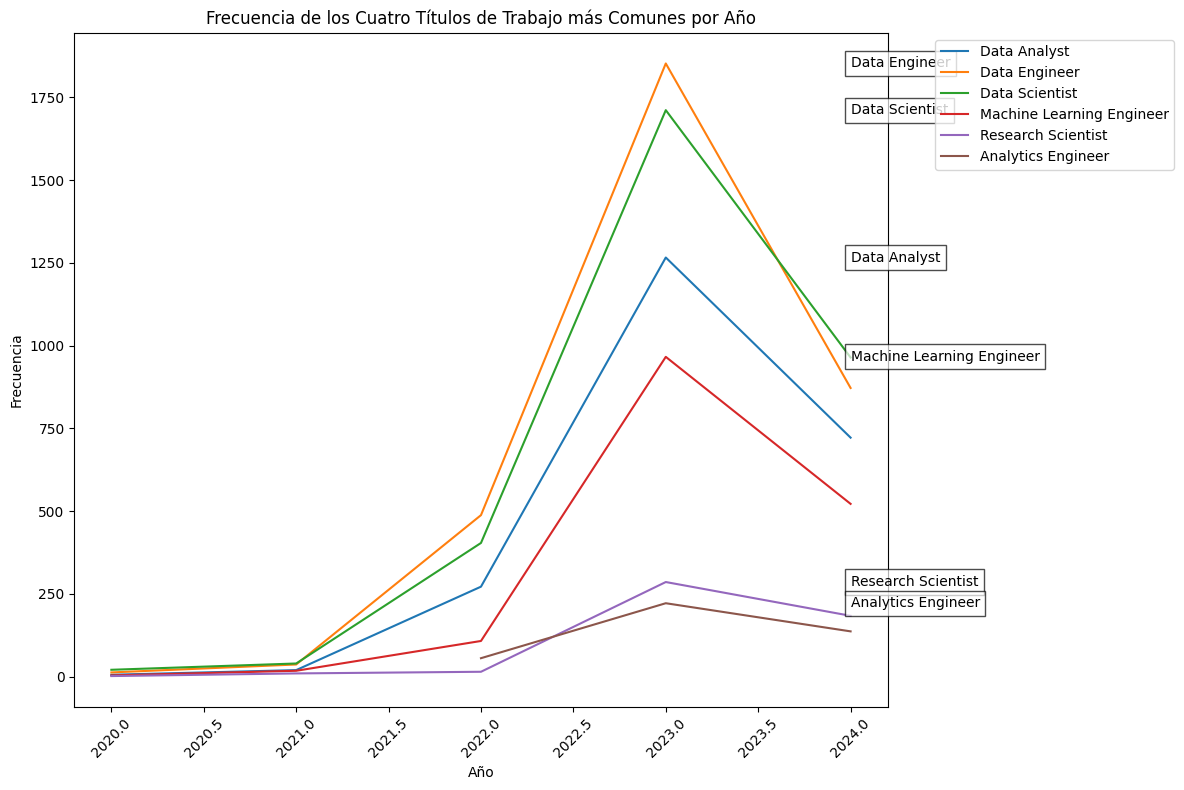

In [19]:

# Obtener los cuatro títulos de trabajo con mayor frecuencia
top_4_titles = titles_by_year.groupby('job_title')['count'].sum().nlargest(6).index.tolist()

# Filtrar los datos para incluir solo los cuatro títulos de trabajo con mayor frecuencia
top_4_data = titles_by_year[titles_by_year['job_title'].isin(top_4_titles)]

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear un gráfico de líneas para representar la frecuencia de los títulos de trabajo por año
sns.lineplot(x='work_year', y='count', hue='job_title', data=top_4_data)
plt.title('Frecuencia de los Cuatro Títulos de Trabajo más Comunes por Año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Agregar etiquetas a las líneas para los cuatro títulos de trabajo más comunes
for title in top_4_titles:
    plt.text(top_4_data[top_4_data['job_title'] == title]['work_year'].max(),  # x-coordinate
             top_4_data[top_4_data['job_title'] == title]['count'].max(),     # y-coordinate
             title,                                                            # texto de la etiqueta
             fontsize=10,                                                      # tamaño de la fuente
             ha='left',                                                         # alineación horizontal
             va='center',                                                       # alineación vertical
             bbox=dict(facecolor='white', alpha=0.7))                           # caja alrededor del texto

# Mostrar el gráfico
plt.tight_layout()
plt.show()



C:\Users\ferna\AppData\Local\Temp\ipykernel_4060\1536410855.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


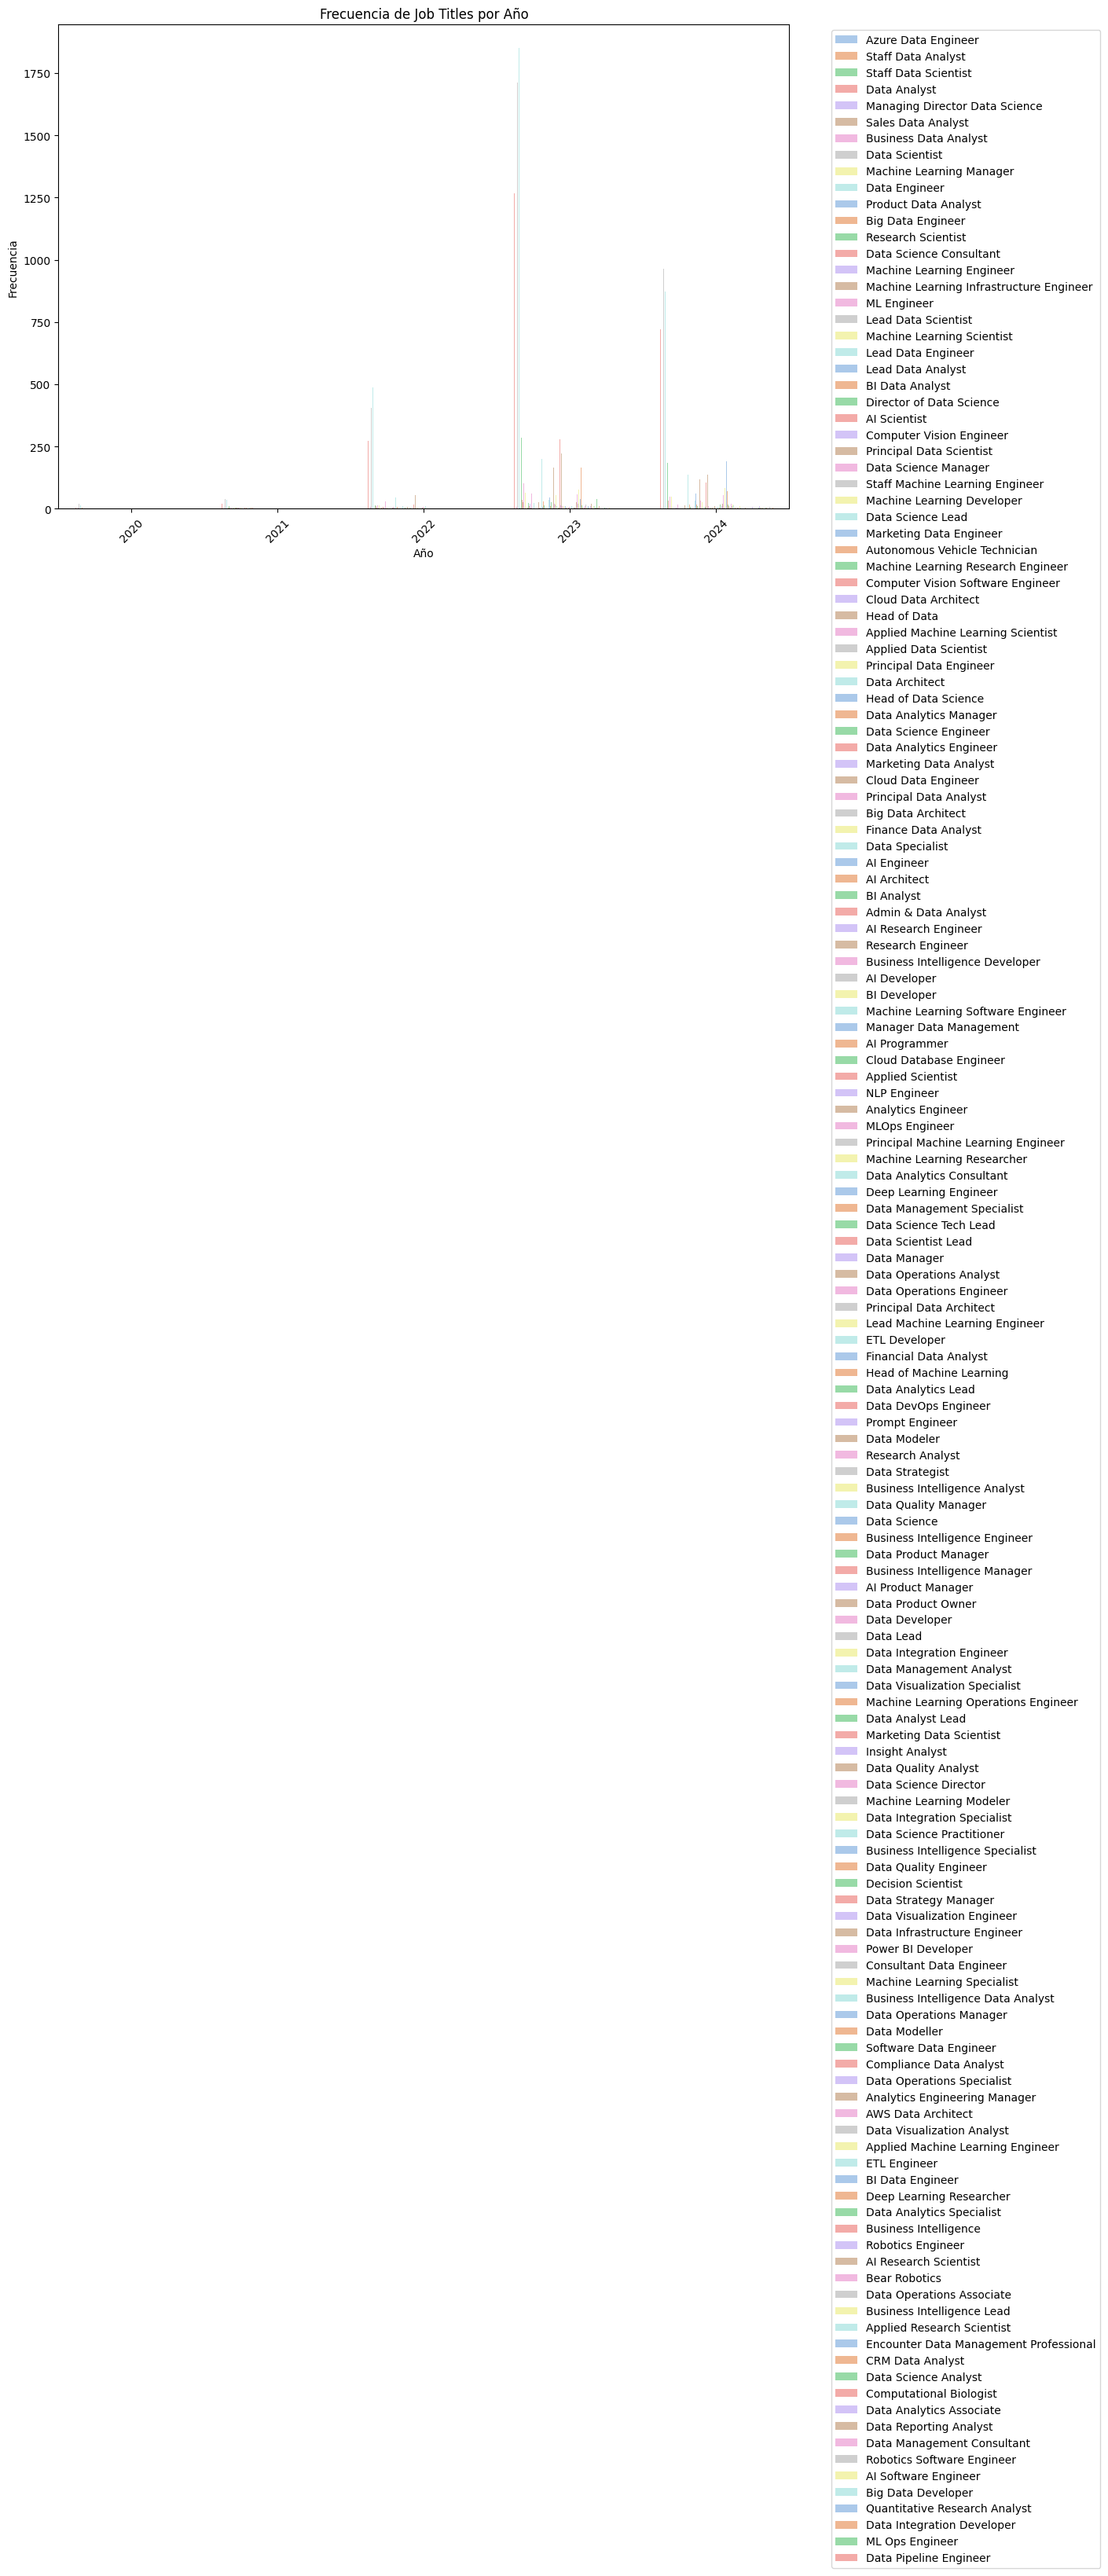

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear un gráfico de barras para mostrar la frecuencia de cada título de trabajo por año
sns.countplot(data=data, x='work_year', hue='job_title', palette='pastel')
plt.title('Frecuencia de Job Titles por Año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)

# Ajustar la leyenda para que no se superponga
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


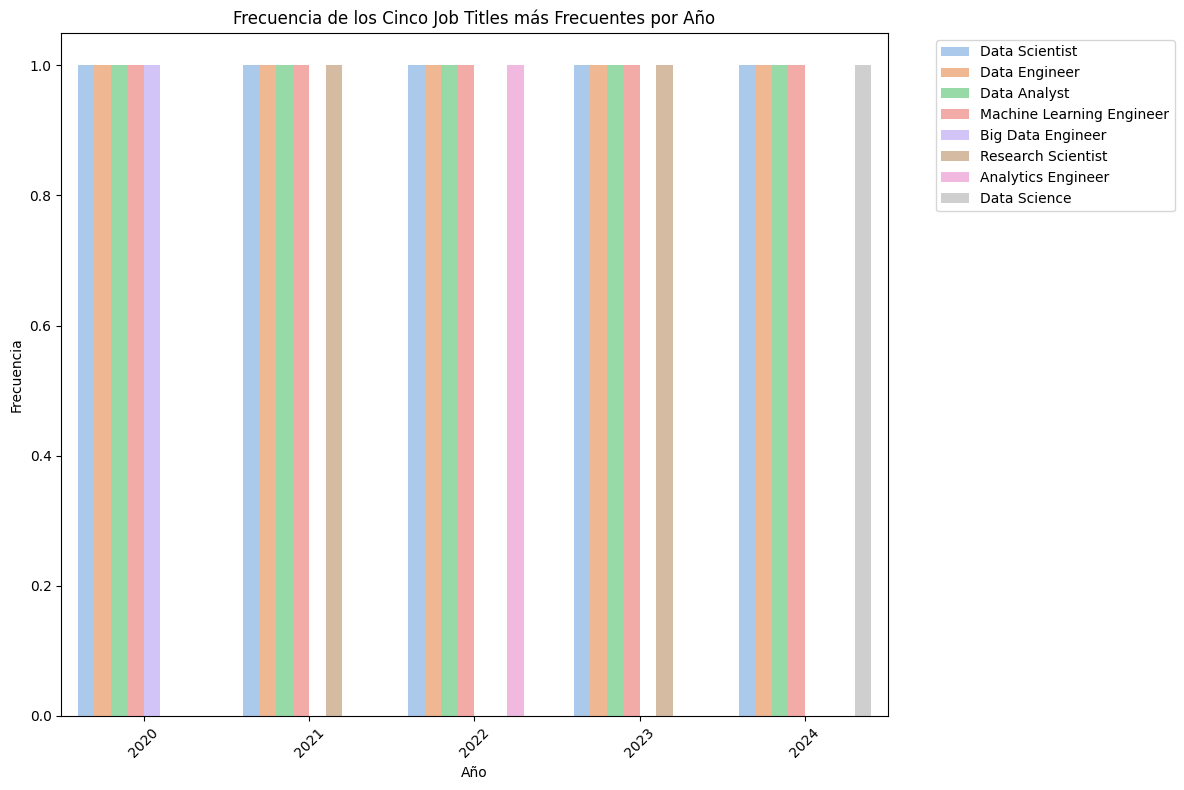

In [21]:
# Obtener los cinco títulos de trabajo más frecuentes por año
top_5_titles_per_year = data.groupby('work_year')['job_title'].value_counts().groupby(level=0).nlargest(5).reset_index(level=0, drop=True).reset_index()

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear un gráfico de barras para mostrar la frecuencia de los cinco títulos de trabajo más frecuentes por año
sns.countplot(data=top_5_titles_per_year, x='work_year', hue='job_title', palette='pastel')
plt.title('Frecuencia de los Cinco Job Titles más Frecuentes por Año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)

# Ajustar la leyenda para que no se superponga
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [22]:
# Agrupar los datos por nivel de experiencia y título de trabajo, y contar la frecuencia
titles_by_experience = data.groupby(['experience_level', 'job_title']).size().reset_index(name='count')

# Para cada nivel de experiencia, obtener los cinco títulos de trabajo más demandados
top_5_titles_per_experience = titles_by_experience.groupby('experience_level').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)

# Mostrar los resultados
print(top_5_titles_per_experience)


   experience_level                  job_title  count
0                EN               Data Analyst    496
1                EN             Data Scientist    140
2                EN              Data Engineer    125
3                EN           Research Analyst     68
4                EN  Machine Learning Engineer     51
5                EX              Data Engineer    149
6                EX               Head of Data     43
7                EX               Data Science     40
8                EX             Data Scientist     37
9                EX   Director of Data Science     28
10               MI              Data Engineer    831
11               MI             Data Scientist    750
12               MI               Data Analyst    538
13               MI  Machine Learning Engineer    246
14               MI         Research Scientist    116
15               SE             Data Scientist   2213
16               SE              Data Engineer   2157
17               SE  Machine

C:\Users\ferna\AppData\Local\Temp\ipykernel_4060\2563970067.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_titles_per_experience = titles_by_experience.groupby('experience_level').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)


C:\Users\ferna\AppData\Local\Temp\ipykernel_4060\3212954730.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=entry_level_data, x='job_title', y='count', palette='pastel')


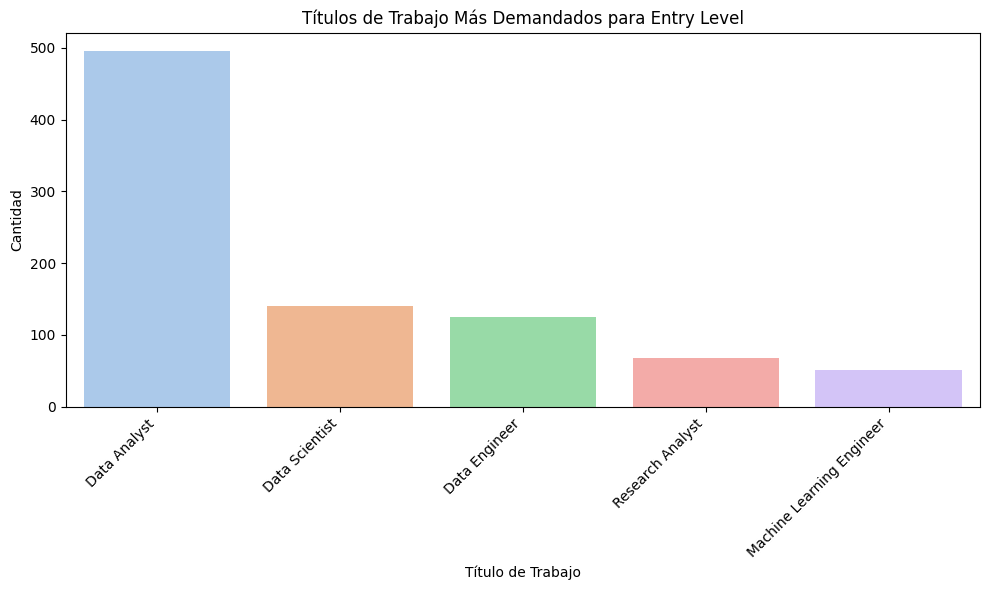

In [23]:


# Filtrar los datos para el nivel de entrada (EN)
entry_level_data = top_5_titles_per_experience[top_5_titles_per_experience['experience_level'] == 'EN']

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear un gráfico de barras para mostrar los valores absolutos de la cantidad de cada título de trabajo
sns.barplot(data=entry_level_data, x='job_title', y='count', palette='pastel')
plt.title('Títulos de Trabajo Más Demandados para Entry Level')
plt.xlabel('Título de Trabajo')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


C:\Users\ferna\AppData\Local\Temp\ipykernel_4060\3249049847.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_titles_by_year = title_counts_by_year.groupby('work_year').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)


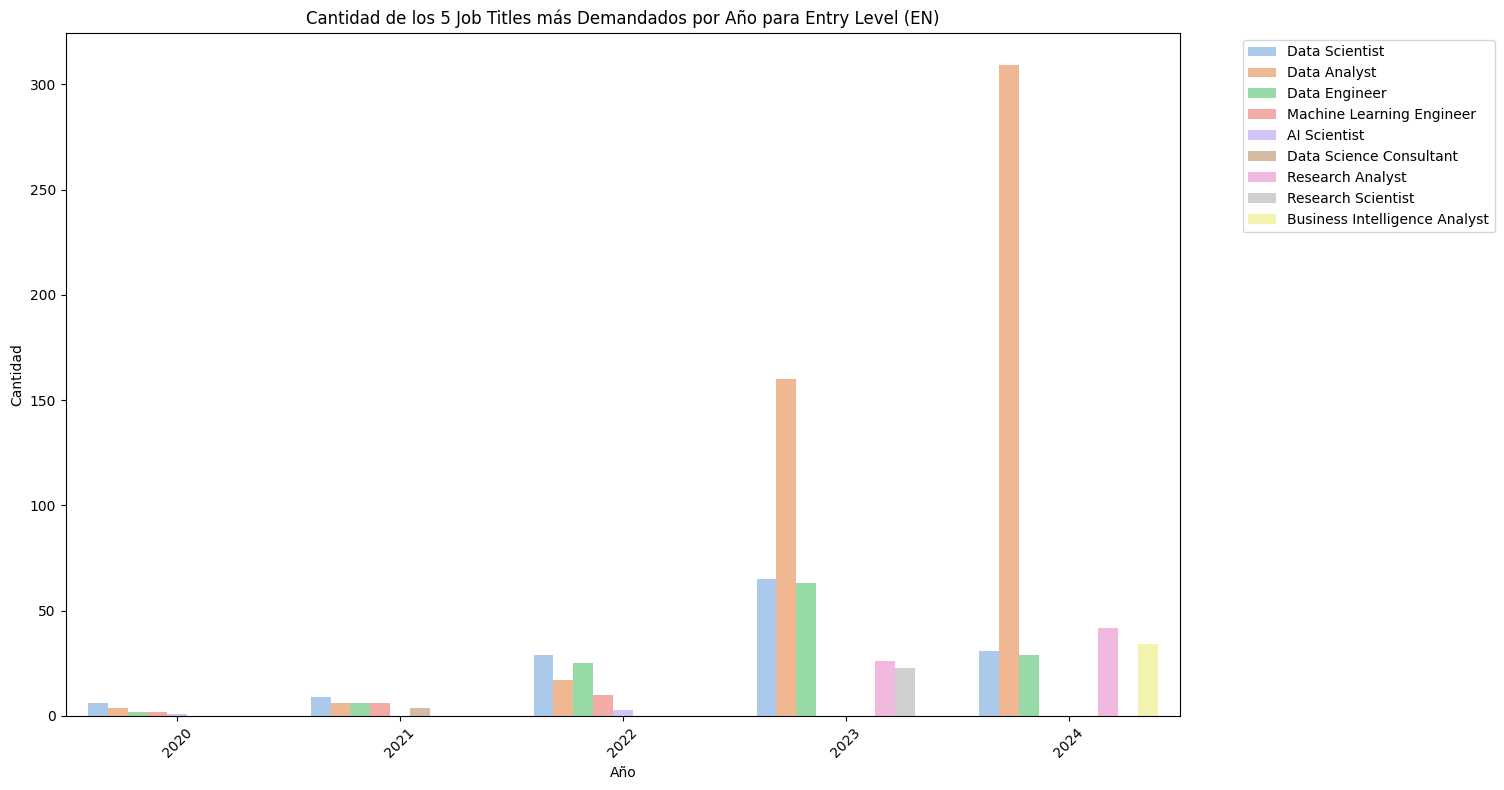

In [28]:


# Filtrar los datos para incluir solo el nivel de entrada (EN)
entry_level_data = data[data['experience_level'] == 'EN']

# Calcular la frecuencia de cada título de trabajo por año para el nivel de entrada
title_counts_by_year = entry_level_data.groupby(['work_year', 'job_title']).size().reset_index(name='count')

# Filtrar los datos para incluir solo los títulos de trabajo más demandados por año
top_5_titles_by_year = title_counts_by_year.groupby('work_year').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear un gráfico de barras agrupadas por año para mostrar la cantidad de cada job title
sns.barplot(data=top_5_titles_by_year, x='work_year', y='count', hue='job_title', palette='pastel')
plt.title('Cantidad de los 5 Job Titles más Demandados por Año para Entry Level (EN)')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [31]:
# Definir los títulos de trabajo específicos
specific_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer', 'Machine Learning Engineer']

# Filtrar los datos para incluir solo los títulos de trabajo específicos
filtered_data = data[data['job_title'].isin(specific_job_titles)]

# Calcular el salario medio en USD por año, nivel de experiencia y título de trabajo
salary_mean_by_year_experience_title = filtered_data.groupby(['work_year', 'experience_level', 'job_title'])['salary_in_usd'].mean().reset_index()

# Mostrar la tabla
print(salary_mean_by_year_experience_title)


    work_year experience_level                  job_title  salary_in_usd
0        2020               EN               Data Analyst   58427.000000
1        2020               EN              Data Engineer   48215.500000
2        2020               EN             Data Scientist   54983.333333
3        2020               EN  Machine Learning Engineer  194000.000000
4        2020               EX              Data Engineer   79833.000000
..        ...              ...                        ...            ...
65       2024               MI  Machine Learning Engineer  164913.542553
66       2024               SE               Data Analyst  127937.981343
67       2024               SE              Data Engineer  160738.621569
68       2024               SE             Data Scientist  163850.868327
69       2024               SE  Machine Learning Engineer  204166.964286

[70 rows x 4 columns]


C:\Users\ferna\AppData\Local\Temp\ipykernel_4060\2590815347.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=filtered_data, x='work_year', y='salary_in_usd', hue='experience_level', hue_order=['MI', 'SE', 'EN', 'EX'],


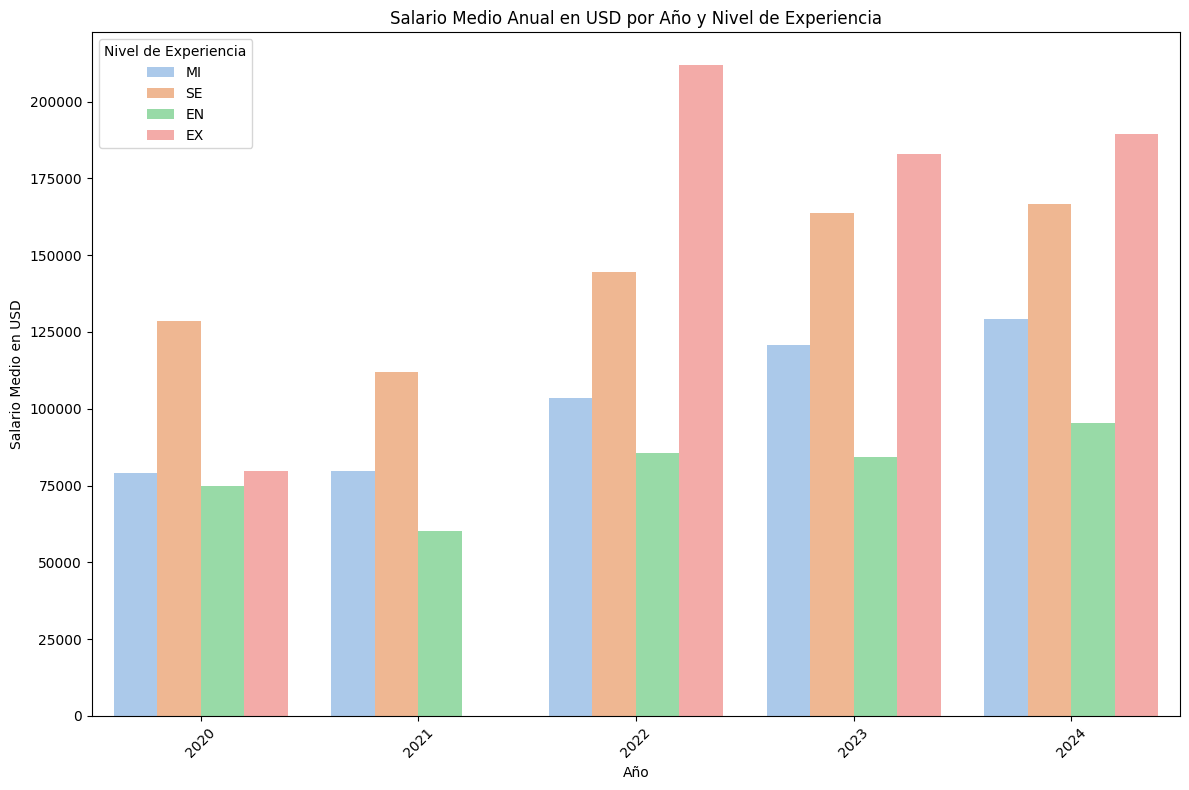

In [32]:


# Filtrar los datos para incluir solo los títulos de trabajo específicos
filtered_data = data[data['job_title'].isin(specific_job_titles)]

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(data=filtered_data, x='work_year', y='salary_in_usd', hue='experience_level', hue_order=['MI', 'SE', 'EN', 'EX'], 
            ci=None, palette='pastel', estimator='mean', dodge=True)
plt.title('Salario Medio Anual en USD por Año y Nivel de Experiencia')
plt.xlabel('Año')
plt.ylabel('Salario Medio en USD')
plt.legend(title='Nivel de Experiencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



C:\Users\ferna\AppData\Local\Temp\ipykernel_4060\52817751.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=filtered_data[filtered_data['job_title'] == job_title], x='work_year', y='salary_in_usd',


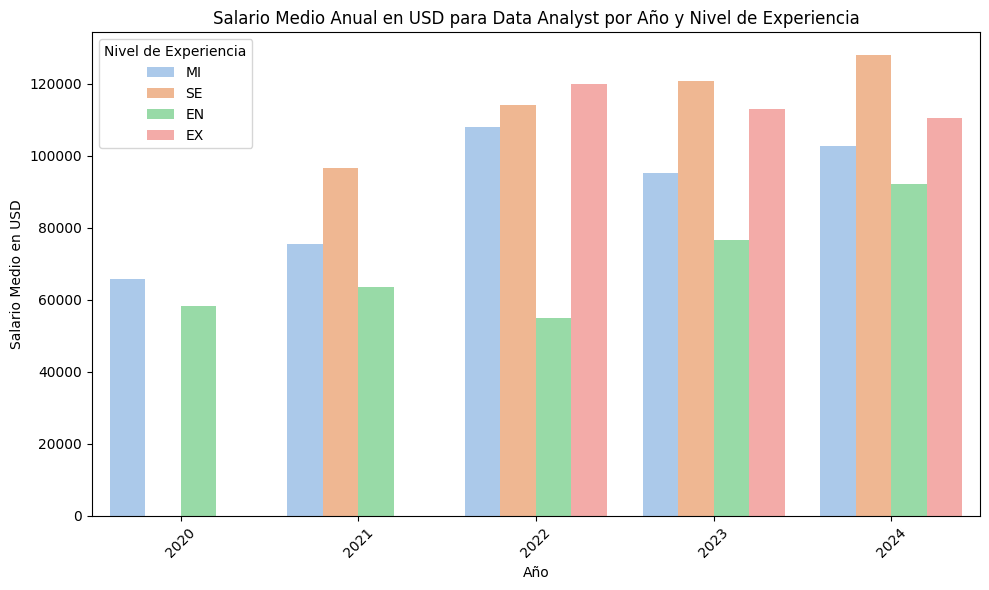

C:\Users\ferna\AppData\Local\Temp\ipykernel_4060\52817751.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=filtered_data[filtered_data['job_title'] == job_title], x='work_year', y='salary_in_usd',


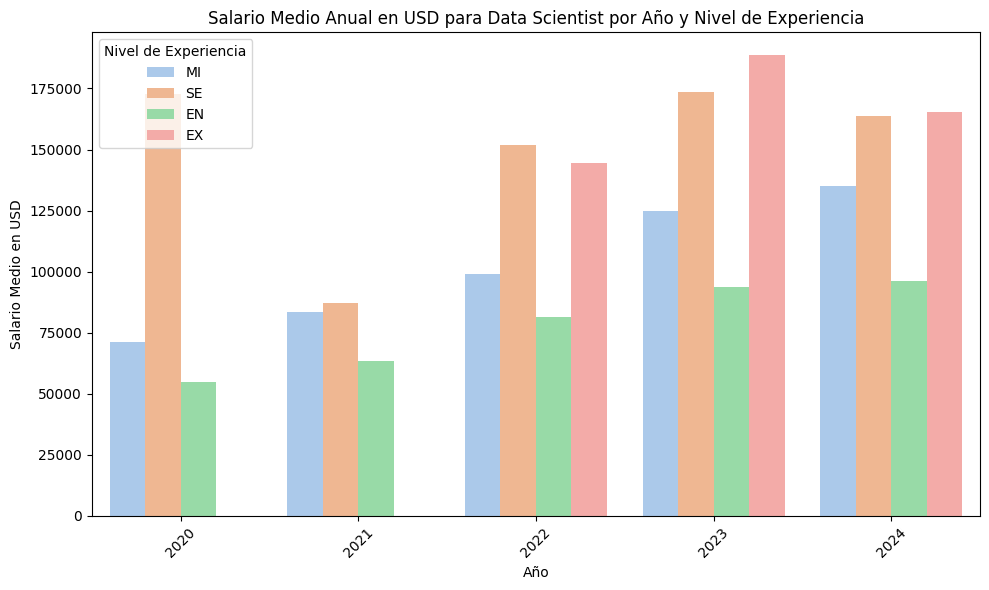

C:\Users\ferna\AppData\Local\Temp\ipykernel_4060\52817751.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=filtered_data[filtered_data['job_title'] == job_title], x='work_year', y='salary_in_usd',


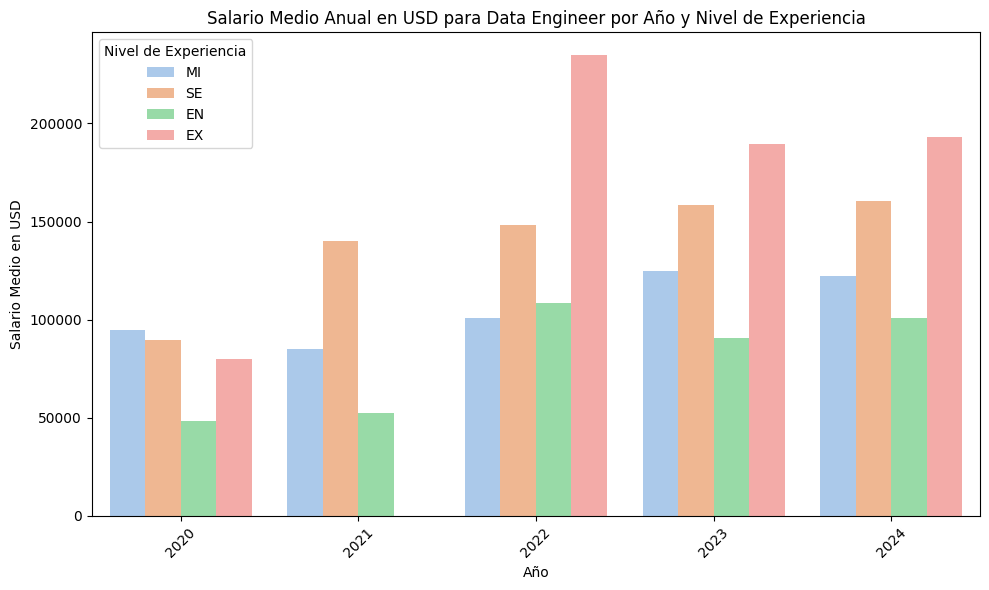

C:\Users\ferna\AppData\Local\Temp\ipykernel_4060\52817751.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=filtered_data[filtered_data['job_title'] == job_title], x='work_year', y='salary_in_usd',


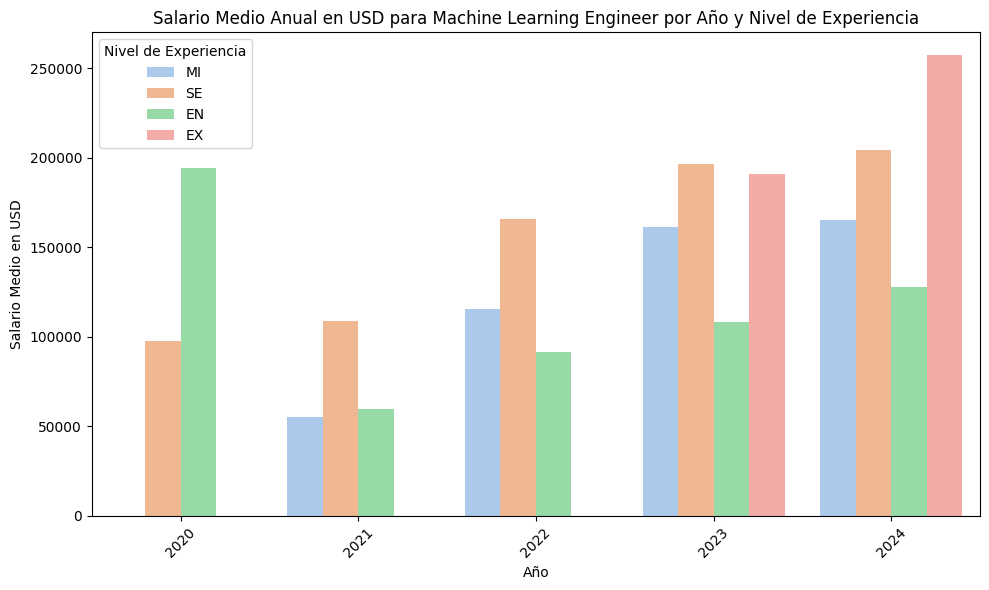

In [33]:


# Filtrar los datos para incluir solo los títulos de trabajo específicos
specific_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer', 'Machine Learning Engineer']
filtered_data = data[data['job_title'].isin(specific_job_titles)]

# Iterar sobre cada título de trabajo y generar un gráfico separado
for job_title in specific_job_titles:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=filtered_data[filtered_data['job_title'] == job_title], x='work_year', y='salary_in_usd', 
                hue='experience_level', hue_order=['MI', 'SE', 'EN', 'EX'], ci=None, palette='pastel', estimator='mean', dodge=True)
    plt.title(f'Salario Medio Anual en USD para {job_title} por Año y Nivel de Experiencia')
    plt.xlabel('Año')
    plt.ylabel('Salario Medio en USD')
    plt.legend(title='Nivel de Experiencia')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [34]:
# Filtrar los datos para incluir solo el año 2023 y nivel de experiencia Entry Level para data analysts
data_analyst_entry_2023 = data[(data['job_title'] == 'Data Analyst') & (data['work_year'] == 2023) & (data['experience_level'] == 'EN')]

# Calcular estadísticas descriptivas
salary_min = data_analyst_entry_2023['salary_in_usd'].min()
salary_max = data_analyst_entry_2023['salary_in_usd'].max()
salary_mean = data_analyst_entry_2023['salary_in_usd'].mean()
salary_median = data_analyst_entry_2023['salary_in_usd'].median()
salary_mode = data_analyst_entry_2023['salary_in_usd'].mode()

print(f"Salario mínimo: {salary_min}")
print(f"Salario máximo: {salary_max}")
print(f"Salario medio: {salary_mean}")
print(f"Salario mediana: {salary_median}")
print(f"Salario moda: {salary_mode}")


Salario mínimo: 18160
Salario máximo: 203000
Salario medio: 76610.83125
Salario mediana: 75000.0
Salario moda: 0    75000
Name: salary_in_usd, dtype: int64


In [35]:
# Filtrar los datos para incluir solo el año 2023, nivel de experiencia Entry Level y residencia en España para data analysts
data_analyst_entry_ES_2023 = data[(data['job_title'] == 'Data Analyst') & 
                                  (data['work_year'] == 2023) & 
                                  (data['experience_level'] == 'EN') & 
                                  (data['employee_residence'] == 'ES')]

# Calcular estadísticas descriptivas
salary_min_ES = data_analyst_entry_ES_2023['salary_in_usd'].min()
salary_max_ES = data_analyst_entry_ES_2023['salary_in_usd'].max()
salary_mean_ES = data_analyst_entry_ES_2023['salary_in_usd'].mean()
salary_median_ES = data_analyst_entry_ES_2023['salary_in_usd'].median()
salary_mode_ES = data_analyst_entry_ES_2023['salary_in_usd'].mode()

print(f"Salario mínimo (ES): {salary_min_ES}")
print(f"Salario máximo (ES): {salary_max_ES}")
print(f"Salario medio (ES): {salary_mean_ES}")
print(f"Salario mediana (ES): {salary_median_ES}")
print(f"Salario moda (ES): {salary_mode_ES}")


Salario mínimo (ES): nan
Salario máximo (ES): nan
Salario medio (ES): nan
Salario mediana (ES): nan
Salario moda (ES): Series([], Name: salary_in_usd, dtype: int64)


In [38]:
# Filtrar los datos para incluir solo los residentes en España
data_ES = data[data['employee_residence'] == 'ES'].copy()

# Mostrar las primeras filas del nuevo DataFrame
data_ES.info()


<class 'pandas.core.frame.DataFrame'>
Index: 133 entries, 190 to 15474
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           133 non-null    int64 
 1   experience_level    133 non-null    object
 2   employment_type     133 non-null    object
 3   job_title           133 non-null    object
 4   salary              133 non-null    int64 
 5   salary_currency     133 non-null    object
 6   salary_in_usd       133 non-null    int64 
 7   employee_residence  133 non-null    object
 8   remote_ratio        133 non-null    int64 
 9   company_location    133 non-null    object
 10  company_size        133 non-null    object
dtypes: int64(4), object(7)
memory usage: 12.5+ KB


In [39]:
# Agrupar los datos por año de trabajo y contar el número de filas en cada grupo
datos_por_año_ES = data_ES.groupby('work_year').size()

# Mostrar el número de datos por año para España
print(datos_por_año_ES)


work_year
2020     3
2021     5
2022    43
2023    71
2024    11
dtype: int64


In [40]:
# Filtrar los datos solo para los años 2022, 2023 y 2024 en España
data_ES_22_23_24 = data_ES[data_ES['work_year'].isin([2022, 2023, 2024])]

# Contar la frecuencia de cada título de trabajo
top_10_job_titles_ES = data_ES_22_23_24['job_title'].value_counts().head(10)

# Mostrar los 10 títulos de trabajo más frecuentes en España
print(top_10_job_titles_ES)


job_title
Data Scientist               58
Data Engineer                24
Data Analyst                 19
Research Scientist            4
Machine Learning Engineer     3
Data Science Director         2
NLP Engineer                  2
Research Analyst              2
AI Engineer                   2
Business Data Analyst         2
Name: count, dtype: int64


In [41]:
# Para ver en qué divisas estan cobrando los trabajadores con residencia en España.
#Agrupar los datos por la columna 'salary_currency' y contar las ocurrencias
currencies_distribution_ES = data_ES_22_23_24.groupby('salary_currency').size().sort_values(ascending=False)

# Mostrar los resultados
print(currencies_distribution_ES)


salary_currency
EUR    117
USD      7
GBP      1
dtype: int64


In [42]:
# Definir las tasas de cambio para convertir las monedas a euros
currency_exchange_rates = {
    'USD': 0.85,  # Tasa de cambio de USD a EUR
    'GBP': 1.15,  # Tasa de cambio de GBP a EUR
    # Añade más tasas de cambio según sea necesario para otras monedas
}

# Convertir los salarios a euros utilizando las tasas de cambio
data_ES_22_23_24['salary_in_eur'] = data_ES_22_23_24.apply(lambda row: row['salary'] * currency_exchange_rates.get(row['salary_currency'], 1), axis=1)

# Filtrar los datos para los puestos de interés en España
filtered_data_ES = data_ES_22_23_24[data_ES_22_23_24['job_title'].isin(['Data Scientist', 'Data Engineer', 'Data Analyst'])]

# Calcular las estadísticas de salario (mínimo, máximo y medio) para cada puesto
salaries_stats_ES = filtered_data_ES.groupby('job_title')['salary_in_eur'].agg(['min', 'max', 'mean'])

# Mostrar los resultados
print(salaries_stats_ES)




                    min       max          mean
job_title                                      
Data Analyst    21000.0   52000.0  39368.421053
Data Engineer   35000.0  164050.0  64640.208333
Data Scientist  29000.0   84000.0  43137.931034


C:\Users\ferna\AppData\Local\Temp\ipykernel_4060\1374226957.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ES_22_23_24['salary_in_eur'] = data_ES_22_23_24.apply(lambda row: row['salary'] * currency_exchange_rates.get(row['salary_currency'], 1), axis=1)


In [43]:
# Filtrar los datos para los trabajadores con residencia en España y salario en USD
data_ES_USD = data_ES_22_23_24[data_ES_22_23_24['salary_currency'] == 'USD']

# Filtrar los datos para los trabajadores con residencia en España y salario en EUR
data_ES_EUR = data_ES_22_23_24[data_ES_22_23_24['salary_currency'] == 'EUR']

# Calcular la media, mínimo y máximo para los salarios en USD
mean_salary_USD = data_ES_USD['salary'].mean()
min_salary_USD = data_ES_USD['salary'].min()
max_salary_USD = data_ES_USD['salary'].max()

# Calcular la media, mínimo y máximo para los salarios en EUR
mean_salary_EUR = data_ES_EUR['salary'].mean()
min_salary_EUR = data_ES_EUR['salary'].min()
max_salary_EUR = data_ES_EUR['salary'].max()

# Mostrar los resultados
print("Salarios en USD para trabajadores con residencia en España:")
print("Media:", mean_salary_USD)
print("Mínimo:", min_salary_USD)
print("Máximo:", max_salary_USD)
print()
print("Salarios en EUR para trabajadores con residencia en España:")
print("Media:", mean_salary_EUR)
print("Mínimo:", min_salary_EUR)
print("Máximo:", max_salary_EUR)


Salarios en USD para trabajadores con residencia en España:
Media: 173414.2857142857
Mínimo: 80000
Máximo: 253750

Salarios en EUR para trabajadores con residencia en España:
Media: 47858.743589743586
Mínimo: 20000
Máximo: 125800


In [45]:
# Filtrar los datos para los trabajadores con residencia en España y salario en GBP
data_ES_GBP = data_ES_22_23_24[data_ES_22_23_24['salary_currency'] == 'GBP']

# Mostrar los datos de los trabajadores con residencia en España y salario en GBP
data_ES_GBP


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_in_eur
7216,2023,SE,FT,Business Data Analyst,65000,GBP,79976,ES,100,GI,L,74750.0


In [46]:
# Filtrar los datos para trabajadores con residencia en España
data_ES = data[data['employee_residence'] == 'ES']

# Separar los datos en dos grupos: salario en USD y salario en EUR
data_ES_USD = data_ES[data_ES['salary_currency'] == 'USD']
data_ES_EUR = data_ES[data_ES['salary_currency'] == 'EUR']

# Calcular la media, mínimo y máximo para los salarios cobrados en USD
mean_salary_usd = data_ES_USD['salary_in_usd'].mean()
min_salary_usd = data_ES_USD['salary_in_usd'].min()
max_salary_usd = data_ES_USD['salary_in_usd'].max()

# Calcular la media, mínimo y máximo para los salarios cobrados en EUR
mean_salary_eur = data_ES_EUR['salary_in_usd'].mean()
min_salary_eur = data_ES_EUR['salary_in_usd'].min()
max_salary_eur = data_ES_EUR['salary_in_usd'].max()

# Mostrar los resultados
print("Salarios cobrados en USD (USD):")
print("Media:", mean_salary_usd)
print("Mínimo:", min_salary_usd)
print("Máximo:", max_salary_usd)

print("\nSalarios cobrados en EUR (USD):")
print("Media:", mean_salary_eur)
print("Mínimo:", min_salary_eur)
print("Máximo:", max_salary_eur)


Salarios cobrados en USD (USD):
Media: 145970.0
Mínimo: 55000
Máximo: 253750

Salarios cobrados en EUR (USD):
Media: 51319.483606557376
Mínimo: 21593
Máximo: 139777
